In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# plt.style.use('ggplot')
sns.set_style('darkgrid', {'grid.background': 'blue'})

# statistics
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

# split & metrics
from sklearn.model_selection import (
    cross_validate, cross_val_score,
    GridSearchCV, KFold, RandomizedSearchCV, 
    train_test_split, StratifiedKFold 
)
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    mean_absolute_percentage_error, make_scorer,
    root_mean_squared_error, PredictionErrorDisplay
)
from sklearn.metrics._scorer import _SCORERS

# preprocessing
# import smogn
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.preprocessing import (
    OneHotEncoder, KBinsDiscretizer, MinMaxScaler,
    OrdinalEncoder, RobustScaler, StandardScaler,
    PolynomialFeatures, 
)
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import RFE, RFECV

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from category_encoders import BinaryEncoder

# models
import shap
shap.initjs()

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge,
    HuberRegressor, TheilSenRegressor,
    QuantileRegressor, RANSACRegressor
)

from sklearn.ensemble import (
    AdaBoostRegressor, GradientBoostingRegressor,
    VotingRegressor, RandomForestRegressor
)
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

# others
import re
import os
import sys
import time
import pickle
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# **Feature Information**

| Column                         | Description                                                                                  | Dtype   |
|--------------------------------|----------------------------------------------------------------------------------------------|---------|
| Customer                       | Unique identifier for each customer.                                                         | object  |
| State                          | The state where the customer resides.                                                        | object  |
| Customer Lifetime Value        | The predicted net profit attributed to the entire future relationship with a customer.       | float64 |
| Response                       | Indicates whether the customer responded to the marketing campaign.                          | object  |
| Coverage                       | Type of coverage purchased by the customer (e.g., Basic, Extended, Premium).                 | object  |
| Education                      | The highest level of education attained by the customer.                                     | object  |
| Effective To Date              | The date when the policy becomes effective.                                                  | object  |
| Employment Status              | The employment status of the customer (e.g., Employed, Unemployed).                          | object  |
| Gender                         | The gender of the customer.                                                                  | object  |
| Income                         | The annual income of the customer.                                                           | int64   |
| Location Code                  | The classification of the customer's location (e.g., Urban, Suburban, Rural).               | object  |
| Marital Status                 | The marital status of the customer.                                                          | object  |
| Monthly Premium Auto           | The monthly premium amount for the auto insurance.                                           | int64   |
| Months Since Last Claim        | The number of months since the customer last made a claim.                                   | int64   |
| Months Since Policy Inception  | The number of months since the customer started the policy.                                  | int64   |
| Number of Open Complaints      | The number of open complaints the customer has with the company.                             | int64   |
| Number of Policies             | The number of policies the customer has with the company.                                    | int64   |
| Policy Type                    | The type of policy the customer has (e.g., Corporate Auto, Personal Auto).                   | object  |
| Policy                         | The specific policy purchased by the customer.                                               | object  |
| Renew Offer Type               | The type of renewal offer provided to the customer.                                          | object  |
| Sales Channel                  | The channel through which the policy was sold (e.g., Agent, Call Center).                    | object  |
| Total Claim Amount             | The total amount claimed by the customer.                                                    | float64 |
| Vehicle Class                  | The class of the vehicle insured (e.g., Two-Door Car, Four-Door Car, SUV).                   | object  |
| Vehicle Size                   | The size of the vehicle insured (e.g., Small, Medsize, Large).                               | object  |


## **Display The Dataset**

In [164]:
df_auto_insurance = pd.read_csv('AutoInsurance.csv')
df_auto_insurance.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4          3/2/2011         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [165]:
# Showing the 8 columns who didnt showing above 
df_auto_insurance[['Effective To Date', 'EmploymentStatus', 'Gender', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim']].head()

Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4          3/2/2011         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  
0        Married                    69                       32  
1         Single                    94                       13  
2        Married                   108                       18  
3        Married                   106                       18  
4         Single                    73                       12

In [166]:
df_auto_insurance.shape

(9134, 24)

In [167]:
df_auto_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### **Sparate data for training and test sets with target and real test set data without target**

In [168]:
# df_stratified =df_auto_insurance.copy()

In [169]:
# df_stratified['Effective To Date']= df_stratified['Effective To Date'].astype('datetime64[ns]')

In [172]:
# # Features and target variable
# X = df_stratified.drop(columns=['Customer Lifetime Value'])
# y = df_stratified['Customer Lifetime Value']

# # Split the data without stratification (since 'Customer Lifetime Value' is continuous)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# # Combine the training and test sets with the target variable
# df_sparate = X_train
# df_sparate['Customer Lifetime Value'] = y_train
# df_sparate.to_csv('autoinsurance_train.csv', index=False)

# test_data = X_test.copy()
# test_data['Customer Lifetime Value'] = y_test

# # Drop the target variable column from the test data
# test_data = test_data.drop(columns=['Customer Lifetime Value'])

# # Save the modified test set to a CSV file
# test_data.to_csv('test_data_finpro.csv', index=False)

# print("Test data saved to 'test_data_finpro.csv'")
# print("Shape of the training data:", df_sparate.shape)
# print("Shape of the real test set data:", test_data.shape)

Test data saved to 'test_data_finpro.csv'
Shape of the training data: (7307, 24)
Shape of the real test set data: (1827, 23)


## Purpose of Data Splitting and Saving

### **Why Split the Data?**
- **Objective:** Splitting the data into training and test sets is crucial for evaluating the performance of machine learning models. The training set is used to train the model, while the test set is reserved for assessing how well the model performs on unseen data. This helps to avoid overfitting and ensures that the model generalizes well to new, unseen data.

**Shapes of Data** :
- Training Data: (7307, 24) – Contains 7307 samples and 24 features (including the target variable).
- Test Data: (1827, 24) – Contains 1827 samples and 24 features (excluding the target variable).

---

# **Read New Data Train _'autoinsurance_train.csv'_**

In [3]:
df = pd.read_csv('autoinsurance_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       7307 non-null   object 
 1   State                          7307 non-null   object 
 2   Response                       7307 non-null   object 
 3   Coverage                       7307 non-null   object 
 4   Education                      7307 non-null   object 
 5   Effective To Date              7307 non-null   object 
 6   EmploymentStatus               7307 non-null   object 
 7   Gender                         7307 non-null   object 
 8   Income                         7307 non-null   int64  
 9   Location Code                  7307 non-null   object 
 10  Marital Status                 7307 non-null   object 
 11  Monthly Premium Auto           7307 non-null   int64  
 12  Months Since Last Claim        7307 non-null   i

In [4]:
df.shape

(7307, 24)

# **Missing Values Check**

In [5]:
# checking missing/Nan value with percentage
print('Missing values status:', df.isnull().values.any())
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / df.shape[0]) * 100
missing_values.sort_values(by='Percentage', ascending=False).reset_index()

Missing values status: False


index  Total Null Values  Percentage
0                        Customer                  0         0.0
1                           State                  0         0.0
2                    Vehicle Size                  0         0.0
3                   Vehicle Class                  0         0.0
4              Total Claim Amount                  0         0.0
5                   Sales Channel                  0         0.0
6                Renew Offer Type                  0         0.0
7                          Policy                  0         0.0
8                     Policy Type                  0         0.0
9              Number of Policies                  0         0.0
10      Number of Open Complaints                  0         0.0
11  Months Since Policy Inception                  0         0.0
12        Months Since Last Claim                  0         0.0
13           Monthly Premium Auto                  0         0.0
14                 Marital Status                  0         0.0
15                  Location Code                  0         0.0
16                         Income                  0         0.0
17                         Gender                  0         0.0
18               EmploymentStatus                  0         0.0
19              Effective To Date                  0         0.0
20                      Education                  0         0.0
21                       Coverage                  0         0.0
22                       Response                  0         0.0
23        Customer Lifetime Value                  0         0.0

# **Duplicates Check**

In [6]:
# Check for duplicate rows
duplicates = df.duplicated()
# Print out the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [7]:
duplicates = df.duplicated(keep='first')

# Print the duplicate rows
if duplicates.sum() > 0:
    print("Duplicate Rows:")
    print(df[duplicates])
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [8]:
# check the proportion of duplicates value

print(f'duplicated data\t\t: {df.duplicated().sum()}')
print(f'duplicated data (%)\t: {df.duplicated().sum() / len(df) * 100:.2f}%')

duplicated data		: 0
duplicated data (%)	: 0.00%


# **White Space and Puctuation**

In [9]:
# checking white space
def check_excessive_whitespace(value):
    if isinstance(value, str):
        return bool(re.search(r'\s{2,}', value))  # Mendeteksi 2 spasi atau lebih
    return False

# Proses deteksi spasi berlebih dan tampilkan informasi
whitespace_info = []
for column in df.columns:
    has_excessive_whitespace = df[column].apply(check_excessive_whitespace).any()
    whitespace_info.append({'Column': column, 'Has Excessive Whitespace': has_excessive_whitespace})

whitespace_df = pd.DataFrame(whitespace_info)
whitespace_df

Column  Has Excessive Whitespace
0                        Customer                     False
1                           State                     False
2                        Response                     False
3                        Coverage                     False
4                       Education                     False
5               Effective To Date                     False
6                EmploymentStatus                     False
7                          Gender                     False
8                          Income                     False
9                   Location Code                     False
10                 Marital Status                     False
11           Monthly Premium Auto                     False
12        Months Since Last Claim                     False
13  Months Since Policy Inception                     False
14      Number of Open Complaints                     False
15             Number of Policies                     False
16                    Policy Type                     False
17                         Policy                     False
18               Renew Offer Type                     False
19                  Sales Channel                     False
20             Total Claim Amount                     False
21                  Vehicle Class                     False
22                   Vehicle Size                     False
23        Customer Lifetime Value                     False

## **Checking Punctuation**

In [10]:
import string

In [11]:
def contains_punctuation(df):
    # This will filter and return unique entries containing any punctuation
    punctuations = string.punctuation
    return df[df.apply(lambda x: any(char in punctuations for char in str(x)))].unique()

In [12]:
text_cols = df.select_dtypes(include=['object']).columns

# Apply the function and display the results
for col in text_cols:
    if df[col].dtype == 'object':
        print(f'Punctuation in {col}:')
        print(contains_punctuation(df[col]))
        print('\n')

Punctuation in Customer:
[]


Punctuation in State:
[]


Punctuation in Response:
[]


Punctuation in Coverage:
[]


Punctuation in Education:
[]


Punctuation in Effective To Date:
['2011-01-29' '2011-02-26' '2011-01-24' '2011-04-02' '2011-05-02'
 '2011-01-26' '2011-01-18' '2011-03-02' '2011-01-22' '2011-11-01'
 '2011-01-15' '2011-02-19' '2011-07-01' '2011-01-14' '2011-02-17'
 '2011-02-01' '2011-01-31' '2011-02-22' '2011-01-19' '2011-01-16'
 '2011-08-01' '2011-10-01' '2011-04-01' '2011-01-21' '2011-02-14'
 '2011-01-30' '2011-06-01' '2011-06-02' '2011-02-27' '2011-12-02'
 '2011-01-20' '2011-02-21' '2011-09-01' '2011-01-13' '2011-02-13'
 '2011-02-24' '2011-02-20' '2011-01-27' '2011-01-17' '2011-08-02'
 '2011-01-01' '2011-01-02' '2011-02-25' '2011-07-02' '2011-02-16'
 '2011-11-02' '2011-01-28' '2011-02-18' '2011-02-15' '2011-03-01'
 '2011-05-01' '2011-09-02' '2011-01-23' '2011-02-02' '2011-12-01'
 '2011-02-23' '2011-01-25' '2011-10-02' '2011-02-28']


Punctuation in EmploymentStatus:
[]


Only Effective to Date column have **Punctuation**, let's check it!

In [13]:
# Ensure the column is treated as a string
df['Effective To Date'] = df['Effective To Date'].astype(str)

# Define the updated regex pattern
pattern = r'[^\w\s/-]'

# Find rows where the pattern is present
problematic_rows = df[df['Effective To Date'].str.contains(pattern, regex=True)]

# Print only the 'Effective To Date' column of problematic rows
print("Rows with unwanted characters in 'Effective To Date':")
print(problematic_rows[['Effective To Date']])

# Print a sample of the column to understand its content
print("Sample of 'Effective To Date' column:")
print(df['Effective To Date'].head(10))

Rows with unwanted characters in 'Effective To Date':
Empty DataFrame
Columns: [Effective To Date]
Index: []
Sample of 'Effective To Date' column:
0    2011-01-29
1    2011-02-26
2    2011-01-24
3    2011-04-02
4    2011-05-02
5    2011-01-26
6    2011-01-18
7    2011-03-02
8    2011-01-22
9    2011-02-26
Name: Effective To Date, dtype: object


In [15]:
df['Effective To Date'].value_counts()

Effective To Date
2011-10-01    161
2011-01-27    157
2011-02-14    148
2011-01-31    145
2011-01-28    144
2011-02-19    139
2011-02-27    139
2011-01-17    138
2011-03-01    138
2011-01-19    137
2011-05-01    136
2011-11-01    136
2011-02-22    136
2011-01-20    135
2011-01-15    135
2011-01-18    134
2011-02-26    133
2011-01-14    133
2011-01-26    132
2011-04-02    132
2011-02-01    131
2011-01-23    131
2011-02-28    131
2011-02-25    129
2011-10-02    129
2011-07-01    128
2011-05-02    128
2011-03-02    127
2011-01-29    126
2011-08-01    124
2011-01-21    123
2011-01-02    122
2011-12-02    121
2011-01-16    120
2011-07-02    119
2011-01-24    118
2011-01-22    118
2011-01-01    117
2011-02-16    117
2011-08-02    116
2011-01-25    116
2011-02-18    116
2011-02-21    115
2011-02-24    114
2011-11-02    113
2011-01-13    112
2011-09-01    111
2011-02-13    110
2011-01-30    110
2011-02-23    109
2011-06-02    109
2011-02-02    107
2011-09-02    105
2011-06-01    104
2011-02-17

# **Exploratory Data Analysis**

## **Descriptive Statistic**

In [18]:
df.describe().T

count                           mean  \
Effective To Date                7307  2011-03-28 21:53:40.637744640   
Income                         7307.0                   37751.821267   
Monthly Premium Auto           7307.0                       93.30245   
Months Since Last Claim        7307.0                      15.131381   
Months Since Policy Inception  7307.0                      48.020118   
Number of Open Complaints      7307.0                       0.386616   
Number of Policies             7307.0                       2.950869   
Total Claim Amount             7307.0                     434.688713   
Customer Lifetime Value        7307.0                    7995.099082   

                                               min                  25%  \
Effective To Date              2011-01-01 00:00:00  2011-01-25 00:00:00   
Income                                         0.0                  0.0   
Monthly Premium Auto                          61.0                 68.0   
Months Since Last Claim                        0.0                  6.0   
Months Since Policy Inception                  0.0                 24.0   
Number of Open Complaints                      0.0                  0.0   
Number of Policies                             1.0                  1.0   
Total Claim Amount                        0.099007           270.269393   
Customer Lifetime Value                1898.007675          3945.980067   

                                               50%                  75%  \
Effective To Date              2011-02-19 00:00:00  2011-05-01 00:00:00   
Income                                     34080.0              62611.0   
Monthly Premium Auto                          83.0                109.0   
Months Since Last Claim                       14.0                 23.0   
Months Since Policy Inception                 48.0                 71.0   
Number of Open Complaints                      0.0                  0.0   
Number of Policies                             2.0                  4.0   
Total Claim Amount                           384.0                547.2   
Customer Lifetime Value                5739.823806          8988.409579   

                                               max           std  
Effective To Date              2011-12-02 00:00:00           NaN  
Income                                     99981.0  30406.123202  
Monthly Premium Auto                         298.0     34.651864  
Months Since Last Claim                       35.0     10.096237  
Months Since Policy Inception                 99.0     27.833325  
Number of Open Complaints                      5.0      0.916498  
Number of Policies                             9.0      2.388074  
Total Claim Amount                     2893.239678    291.799299  
Customer Lifetime Value                83325.38119   6880.861721

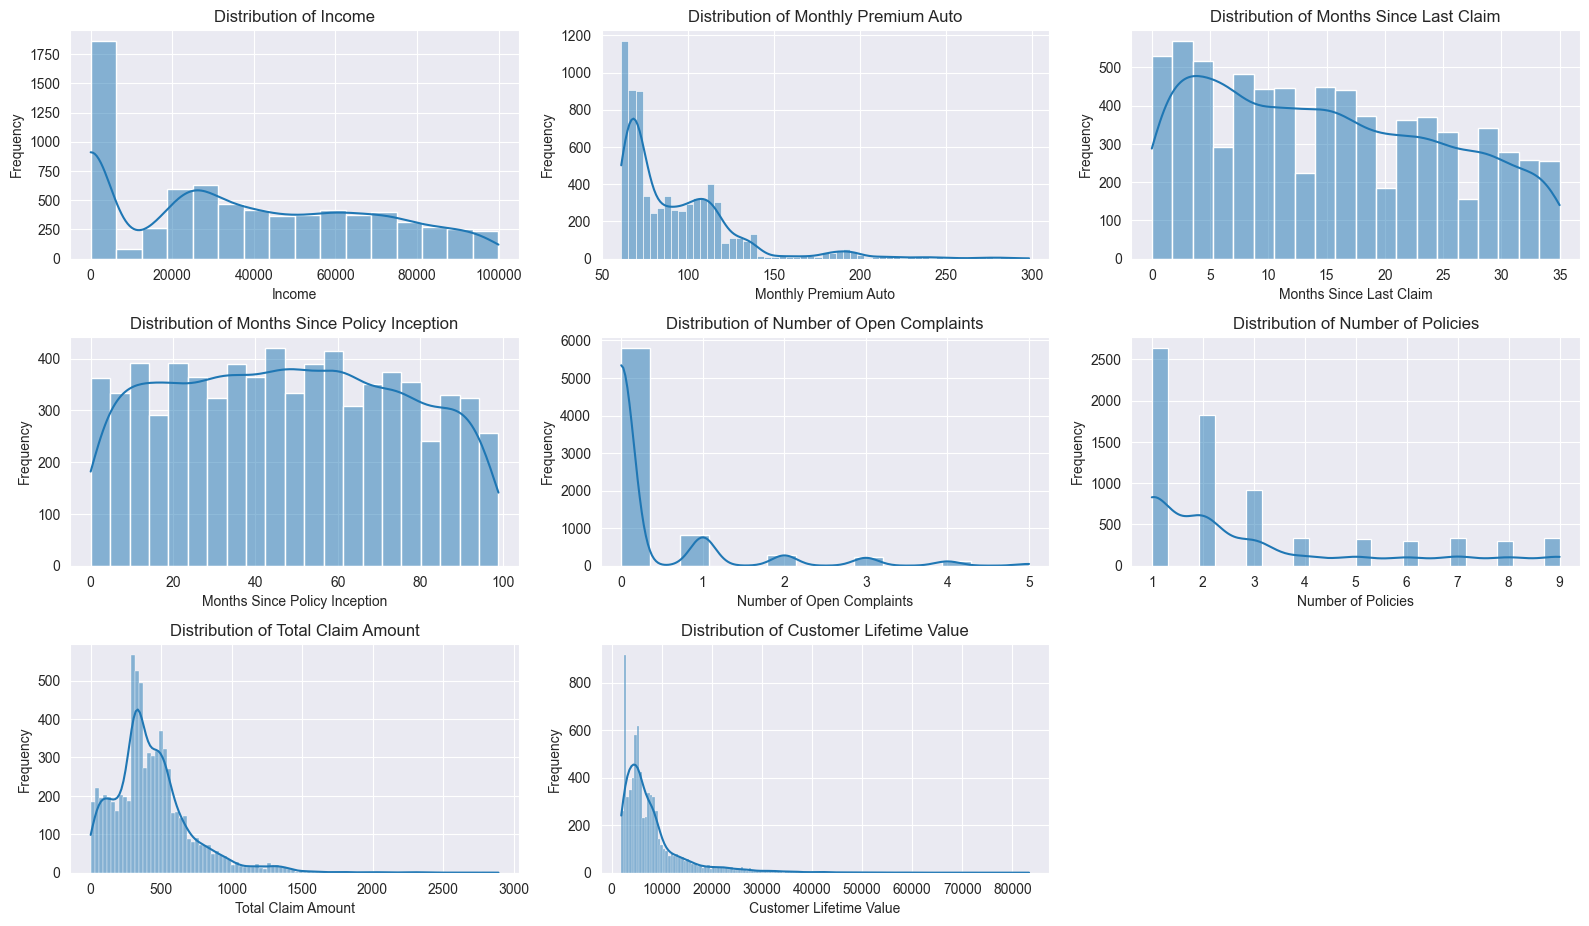

In [19]:
# Define the numeric columns to plot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)  # Adjust subplot size based on the number of columns
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### **Insights:**

- **Customer Lifetime Value**: Shows substantial variability with a high mean and large standard deviation. This indicates a broad range of customer values, with some outliers significantly affecting the mean. The maximum value is quite high compared to the median.

- **Income**: The mean income is high, but the large standard deviation and the presence of many zero values suggest a skewed distribution. There may be a significant portion of the data with very low or zero income.

- **Monthly Premium Auto**: The mean and median values are relatively close, suggesting a less skewed distribution. However, the range of premiums is broad, with some policies costing significantly more than the average.

- **Months Since Last Claim**: The data shows a typical range of 6 to 35 months, with a mean close to the median. This suggests a fairly consistent pattern of claim frequency.

- **Months Since Policy Inception**: The dataset includes a wide range of policy ages, from newly started to nearly expired policies. This diversity can be useful for understanding different policyholder behaviors over time.

- **Number of Open Complaints**: Most records have zero open complaints, with a few outliers having up to 5 complaints. This indicates that most customers have either no complaints or very few.

- **Number of Policies**: The average number of policies per customer is just below 3, with some customers having up to 9 policies. This suggests a moderate level of policy ownership, with a few customers holding multiple policies.

- **Total Claim Amount**: The mean claim amount is substantial, but the high standard deviation and maximum value indicate that some claims are much higher than the average. This could be due to a few large claims skewing the results.

#### **Consistency Check:**
 The value for "Months Since Last Claim" should logically always be less than or equal to "Months Since Policy Inception." If "Months Since Last Claim" is greater, it would imply that a claim was made before the policy even started, which doesn't make sense.

In [20]:
# Identify and display rows where 'Months Since Last Claim' > 'Months Since Policy Inception'
inconsistent_rows = df[df['Months Since Last Claim'] > df['Months Since Policy Inception']]

# Display the first 2 rows with this inconsistency
inconsistent_rows.head(2)

Customer    State Response Coverage             Education Effective To Date  \
2  OZ47099  Arizona       No    Basic                Master        2011-01-24   
3  KM52241  Arizona       No    Basic  High School or Below        2011-04-02   

  EmploymentStatus Gender  Income Location Code  ...  \
2       Unemployed      M       0      Suburban  ...   
3       Unemployed      F       0         Rural  ...   

  Number of Open Complaints  Number of Policies     Policy Type        Policy  \
2                         0                   1  Corporate Auto  Corporate L3   
3                         0                   2   Personal Auto   Personal L1   

   Renew Offer Type  Sales Channel Total Claim Amount  Vehicle Class  \
2            Offer4         Branch         340.800000  Four-Door Car   
3            Offer1         Branch          47.502366  Four-Door Car   

  Vehicle Size Customer Lifetime Value  
2      Medsize             2676.948677  
3      Medsize             8430.059143  

[2 rows x 24 columns]

### **Does It Make Sense?**
Logically, it does not make sense for Months Since Last Claim to be greater than Months Since Policy Inception. Since the policy must be active before a claim can be made, the number of months since the last claim should never exceed the number of months the policy has been in effect.

In [21]:
# Filter the rows where 'Months Since Last Claim' is greater than 'Months Since Policy Inception'
invalid_rows_count = df[df['Months Since Last Claim'] > df['Months Since Policy Inception']].shape[0]

# Display the count of such rows
print(f"Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception': {invalid_rows_count}")


Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception': 1195


Where Months Since Last Claim is greater than Months Since Policy Inception, this might indicate data entry errors or inconsistencies that need to be investigated.
**Lets investigated**

In [22]:
# Filter the rows where 'Months Since Last Claim' > 'Months Since Policy Inception' 
# and comparation between 'Number of Policies' < 0 and 'Number of Policies' > 1
filtered_rows_count_0 = df[(df['Months Since Last Claim'] > df['Months Since Policy Inception']) & 
                         (df['Number of Policies'] <= 1)].shape[0]
filtered_rows_count_1= df[(df['Months Since Last Claim'] > df['Months Since Policy Inception']) & 
                         (df['Number of Policies'] >= 2)].shape[0]
                         

# Display the count of such rows
print(f"Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception' and 'Number of Policies' <= 1 : {filtered_rows_count_0}")
print(f"Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception' and 'Number of Policies' > 1 : {filtered_rows_count_1}")

Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception' and 'Number of Policies' <= 1 : 429
Number of rows where 'Months Since Last Claim' > 'Months Since Policy Inception' and 'Number of Policies' > 1 : 766


## Inconsistent Data with Single Policy Holders

- **Observation:** There are 429 rows where `Months Since Last Claim` is greater than `Months Since Policy Inception` and the customer has `Number of Policies <= 1`.

- **Interpretation:** This is a significant red flag. Since a customer with only one policy should not have a claim that predates the inception of their policy, these 521 rows likely indicate data entry errors or inconsistencies. It's highly improbable that a claim could be recorded before the policy began, especially when the customer only has one policy.

- **Action:** These rows should be reviewed and corrected. The inconsistency suggests that either the `Months Since Last Claim` or `Months Since Policy Inception` was entered incorrectly.

---

## Customers with Multiple Policies

- **Observation:** There are 766 rows where `Months Since Last Claim` is greater than `Months Since Policy Inception` and the customer has `Number of Policies > 1`.

- **Interpretation:** In this case, the data might make more sense if we consider that customers with multiple policies could have had one policy for a long time and recently acquired another. The `Months Since Last Claim` could refer to a claim made under an earlier policy, while `Months Since Policy Inception` might refer to a newer policy. However, this still raises the question of why these dates are inconsistent, which might suggest overlapping or sequential policies.

- **Consideration:** This could point to a valid business scenario where customers hold multiple policies (possibly including non-auto policies), but it's essential to ensure that the dates are being tracked correctly. The system should be able to distinguish between claims related to different policies to avoid these inconsistencies.

---

## *Decision*

## Delete Inconsistency Rows

### Pros:
- Removing the 1195 inconsistent rows (429 with `Number of Policies <= 1` and 766 with `Number of Policies > 1`) cleans up the dataset and ensures that only logically consistent data is used for analysis.
- This approach retains the bulk of the dataset while addressing known issues, leading to more reliable insights and model performance.

### Cons:
- May lose 16.36% of the data, which might reduce the dataset's diversity and richness, potentially affecting model generalizability.
- There is a risk of discarding data that could have been corrected rather than deleted, which might be valuable in certain analyses.

---

### This approach allows to:

- **Maintain the Integrity of the Dataset:** By removing only the problematic rows, you preserve the integrity of the data and ensure that any analysis or modeling is based on logically consistent information.

- **Retain Valuable Features:** You keep the `Months Since Last Claim` column, which could be an important feature, especially in understanding customer behavior or predicting outcomes.

- **Minimize Data Loss:** Although i lose 16.36% of the data, this is a reasonable trade-off for ensuring the remaining data is reliable and valid for analysis.


In [23]:
df_1 =df[~(df['Months Since Last Claim'] > df['Months Since Policy Inception'])]

# Display the shape of the cleaned DataFrame to confirm the removal
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_1.shape}")

Original dataset shape: (7307, 24)
Cleaned dataset shape: (6112, 24)


## **Recap All Unique Data**

In [24]:
# List to hold information about each column
list_item = []

# Collect information for each column
for col in df_1.columns:
    list_item.append([
        col, 
        df_1[col].dtype, 
        df_1[col].isna().sum(), 
        (df_1[col].isna().sum() / len(df_1)) * 100,
        df_1[col].nunique(),
        df_1[col].unique()
    ])

# Create a DataFrame from the collected information
df_1_desc = pd.DataFrame(
    columns=['data_features', 'data_type', 'null', '%_null', 'unique', 'unique_sample'],
    data=list_item
)

# Adjust display settings to show all values
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
df_1_desc

data_features       data_type  null  %_null  unique  \
0                        Customer          object     0     0.0    6112   
1                           State          object     0     0.0       5   
2                        Response          object     0     0.0       2   
3                        Coverage          object     0     0.0       3   
4                       Education          object     0     0.0       5   
5               Effective To Date  datetime64[ns]     0     0.0      59   
6                EmploymentStatus          object     0     0.0       5   
7                          Gender          object     0     0.0       2   
8                          Income           int64     0     0.0    3836   
9                   Location Code          object     0     0.0       3   
10                 Marital Status          object     0     0.0       3   
11           Monthly Premium Auto           int64     0     0.0     188   
12        Months Since Last Claim           int64     0     0.0      36   
13  Months Since Policy Inception           int64     0     0.0     100   
14      Number of Open Complaints           int64     0     0.0       6   
15             Number of Policies           int64     0     0.0       9   
16                    Policy Type          object     0     0.0       3   
17                         Policy          object     0     0.0       9   
18               Renew Offer Type          object     0     0.0       4   
19                  Sales Channel          object     0     0.0       4   
20             Total Claim Amount         float64     0     0.0    3482   
21                  Vehicle Class          object     0     0.0       6   
22                   Vehicle Size          object     0     0.0       3   
23        Customer Lifetime Value         float64     0     0.0    5421   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                unique_sample  
0                                                                                                                                                                                                                                                                                                                                                                                                   [MP13698, ZF84449, WH11924, QH27767, YV40022, YQ11786, FW16824, TB56369, XR82418, AA30683, OY96856, YQ44187, JK53304, CT88432, KY33386, TR67616, XM11175, KL84615, FQ66351, WL72919, CL38124, UC83161, YO14199, WD85096, YA80645, IF87079, HU54636, ZG84862, HK84372, KH16079, PB43222, MM90239, ZB62469, TT20057, WZ56476, XR75319, XN11823, TA22923, UU70820, AP32891, SF30642, MH40017, FS29897, CF50291, OJ84485, RC74014, DX98298, QN15356, HU41273, KE45653, WF73839, 

### Data Features Overview

- Data_features : Shows the column's dataframe.
- Data Type: Specifies the column's data type.
- Null Values: Indicates no missing values in this column.
- Unique Values: Number of unique date entries.
- Unique Sample Values: Provides a sample of date values from the column.
- Common Date Formats: Highlights the range of date formats and possible inconsistencies.
- Potential Issues: Identifies any data cleaning tasks required.

#### Effective To Date Column Highlights

- **Data Type:** `object`
- **Null Values:** 0 (0.0%)
- **Unique Values:** 59
- **Unique Sample Values:**
  - `2/24/11`
  - `1/31/11`
  - `2/19/11`
  - `1/20/11`
  - `3/2/2011`
  - `1/25/11`
  - `1/18/11`
  - `1/26/11`
  - `2/17/11`
  - `2/21/11`
  - `...` (and more)
- **Common Date Formats:** Dates range from `1/1/2011` to `12/31/2011`, with some variations in format (e.g., `2/2/2011` and `6/1/2011`).
- **Potential Issues:**
  - **Inconsistent Date Formats:** Mixed date formats observed.
  - **Data Cleaning Needed:** Standardize date formats for consistency to - `MM/DD/YYYY` (e.g., `3/2/2011`)

## **Change Datetime Format**

In [25]:
df_1['Effective To Date']= df_1['Effective To Date'].astype('datetime64[ns]')

## **Descriptive Statistic after Drop Inconsistency Rows**

In [26]:
df_1.describe().T

count                           mean  \
Effective To Date                6112  2011-03-29 01:37:32.356020992   
Income                         6112.0                   37550.861257   
Monthly Premium Auto           6112.0                      93.755236   
Months Since Last Claim        6112.0                      13.834424   
Months Since Policy Inception  6112.0                      55.272415   
Number of Open Complaints      6112.0                       0.385635   
Number of Policies             6112.0                       2.949607   
Total Claim Amount             6112.0                     437.039113   
Customer Lifetime Value        6112.0                    8013.401117   

                                               min                  25%  \
Effective To Date              2011-01-01 00:00:00  2011-01-25 00:00:00   
Income                                         0.0                  0.0   
Monthly Premium Auto                          61.0                 69.0   
Months Since Last Claim                        0.0                  5.0   
Months Since Policy Inception                  0.0                 36.0   
Number of Open Complaints                      0.0                  0.0   
Number of Policies                             1.0                  1.0   
Total Claim Amount                        0.099007           272.753567   
Customer Lifetime Value                1898.007675           3939.00637   

                                               50%                  75%  \
Effective To Date              2011-02-19 00:00:00  2011-05-01 00:00:00   
Income                                     33834.5              62464.0   
Monthly Premium Auto                          83.0                109.0   
Months Since Last Claim                       12.0                 21.0   
Months Since Policy Inception                 55.0                 75.0   
Number of Open Complaints                      0.0                  0.0   
Number of Policies                             2.0                  4.0   
Total Claim Amount                           384.0                547.2   
Customer Lifetime Value                5758.676549          8928.209295   

                                               max           std  
Effective To Date              2011-12-02 00:00:00           NaN  
Income                                     99981.0  30522.303825  
Monthly Premium Auto                         298.0     35.237414  
Months Since Last Claim                       35.0      9.870495  
Months Since Policy Inception                 99.0     24.323131  
Number of Open Complaints                      5.0       0.92317  
Number of Policies                             9.0      2.385197  
Total Claim Amount                     2893.239678    296.045607  
Customer Lifetime Value                83325.38119   6967.575069

**Summary Statistics**

## Insight from the Data

### **Income**
- **Mean Income:** \$37,550.86
- **Min Income:** \$0.00
- **Max Income:** \$99,981.00
- **Standard Deviation:** \$30,522.30

**Insight:** The income distribution shows a significant spread, with many customers earning $0 (potentially indicating missing or unreported income) and a substantial portion earning below the median of $33,834.5. The high standard deviation indicates a wide disparity in income levels among customers, suggesting that the customer base includes both low-income and high-income individuals.

---

### **Monthly Premium Auto**
- **Mean Monthly Premium:** \$93.76
- **Min Monthly Premium:** \$61.00
- **Max Monthly Premium:** \$298.00
- **Standard Deviation:** \$35.24

**Insight:** The monthly premium varies moderately, with most customers paying between $69 and $109. The relatively high maximum premium of $298 suggests that some customers are opting for premium coverage or have additional features on their policies. The standard deviation indicates some variation in premium amounts, but most customers are within a similar range.

---

### **Months Since Last Claim**
- **Mean Months Since Last Claim:** 13.83 months
- **Min Months Since Last Claim:** 0 months
- **Max Months Since Last Claim:** 35 months
- **Standard Deviation:** 9.87 months

**Insight:** The average time since the last claim is about 13.83 months, with a notable range from 0 to 35 months. This suggests that while some customers have made claims recently, others have gone nearly three years without making a claim. The wide range and standard deviation indicate diverse customer behaviors regarding claims.

---

### **Months Since Policy Inception**
- **Mean Months Since Policy Inception:** 55.27 months
- **Min Months Since Policy Inception:** 0 months
- **Max Months Since Policy Inception:** 99 months
- **Standard Deviation:** 24.32 months

**Insight:** The average policy age is approximately 4.6 years (55.27 months). The data spans a wide range, from newly initiated policies (0 months) to nearly 8.25-year-old policies (99 months). The standard deviation shows a substantial variation in how long customers have held their policies, indicating a mix of both new and long-term customers.

---

### **Number of Open Complaints**
- **Mean Number of Open Complaints:** 0.39
- **Min Number of Open Complaints:** 0
- **Max Number of Open Complaints:** 5
- **Standard Deviation:** 0.92

**Insight:** Most customers have no open complaints, with a mean close to zero, indicating a generally satisfactory customer experience. However, a few customers have up to 5 open complaints, which could indicate unresolved issues or dissatisfaction. The low mean and high maximum highlight the rarity of complaints but also point to potential problems with a small subset of customers.

---

### **Number of Policies**
- **Mean Number of Policies:** 2.95
- **Min Number of Policies:** 1
- **Max Number of Policies:** 9
- **Standard Deviation:** 2.39

**Insight:** On average, customers hold about 3 policies, with some having up to 9. The data shows that while many customers have just one policy, a significant portion holds multiple policies, which could indicate cross-selling success or a strong customer relationship.

---

### **Total Claim Amount**
- **Mean Total Claim Amount:** \$437.04
- **Min Total Claim Amount:** \$0.10
- **Max Total Claim Amount:** \$2,893.24
- **Standard Deviation:** \$296.05

**Insight:** The total claim amount varies widely, with a mean of \$437.04. The minimum claim amount is very low, possibly indicating minor claims, while the maximum of nearly \$2,893.24 suggests that some customers have made significant claims. The wide standard deviation reflects the diversity in claim amounts, with a few large claims skewing the mean upwards.

---

### **Customer Lifetime Value (CLV)**
- **Mean CLV:** \$8,013.40
- **Min CLV:** \$1,898.01
- **Max CLV:** \$83,325.38
- **Standard Deviation:** \$6,967.58

**Insight:** The Customer Lifetime Value (CLV) has a high mean of \$8,013.40, with substantial variability across the customer base. The maximum CLV is exceptionally high, indicating that some customers are extremely valuable to the company. The wide standard deviation suggests that while many customers contribute moderate value, there are significant outliers with very high lifetime values.

---

### **Overall Insights**
- The dataset reveals a diverse customer base with varying income levels, policy durations, and claim behaviors. 
- **Income** and **Customer Lifetime Value** show the most variability, reflecting a broad spectrum of customer types, from low-income individuals to high-value customers.
- **Complaints** are relatively rare, but the presence of some high-complaint customers might warrant further investigation.
- The spread in **policy count** and **total claim amounts** indicates different levels of engagement and risk among the customers, which could inform targeted strategies for customer retention and risk management.


In [27]:
df_1.describe(include='O').T

count unique            top  freq
Customer          6112   6112        MP13698     1
State             6112      5     California  2152
Response          6112      2             No  5240
Coverage          6112      3          Basic  3708
Education         6112      5       Bachelor  1863
EmploymentStatus  6112      5       Employed  3782
Gender            6112      2              F  3120
Location Code     6112      3       Suburban  3850
Marital Status    6112      3        Married  3540
Policy Type       6112      3  Personal Auto  4537
Policy            6112      9    Personal L3  2333
Renew Offer Type  6112      4         Offer1  2585
Sales Channel     6112      4          Agent  2335
Vehicle Class     6112      6  Four-Door Car  3094
Vehicle Size      6112      3        Medsize  4270

## **Univariate Categorical**

In [28]:
numcols=df_1.select_dtypes(['int64','float64']).columns
catcols = df_1.select_dtypes('object').columns

____

## **Distribution**

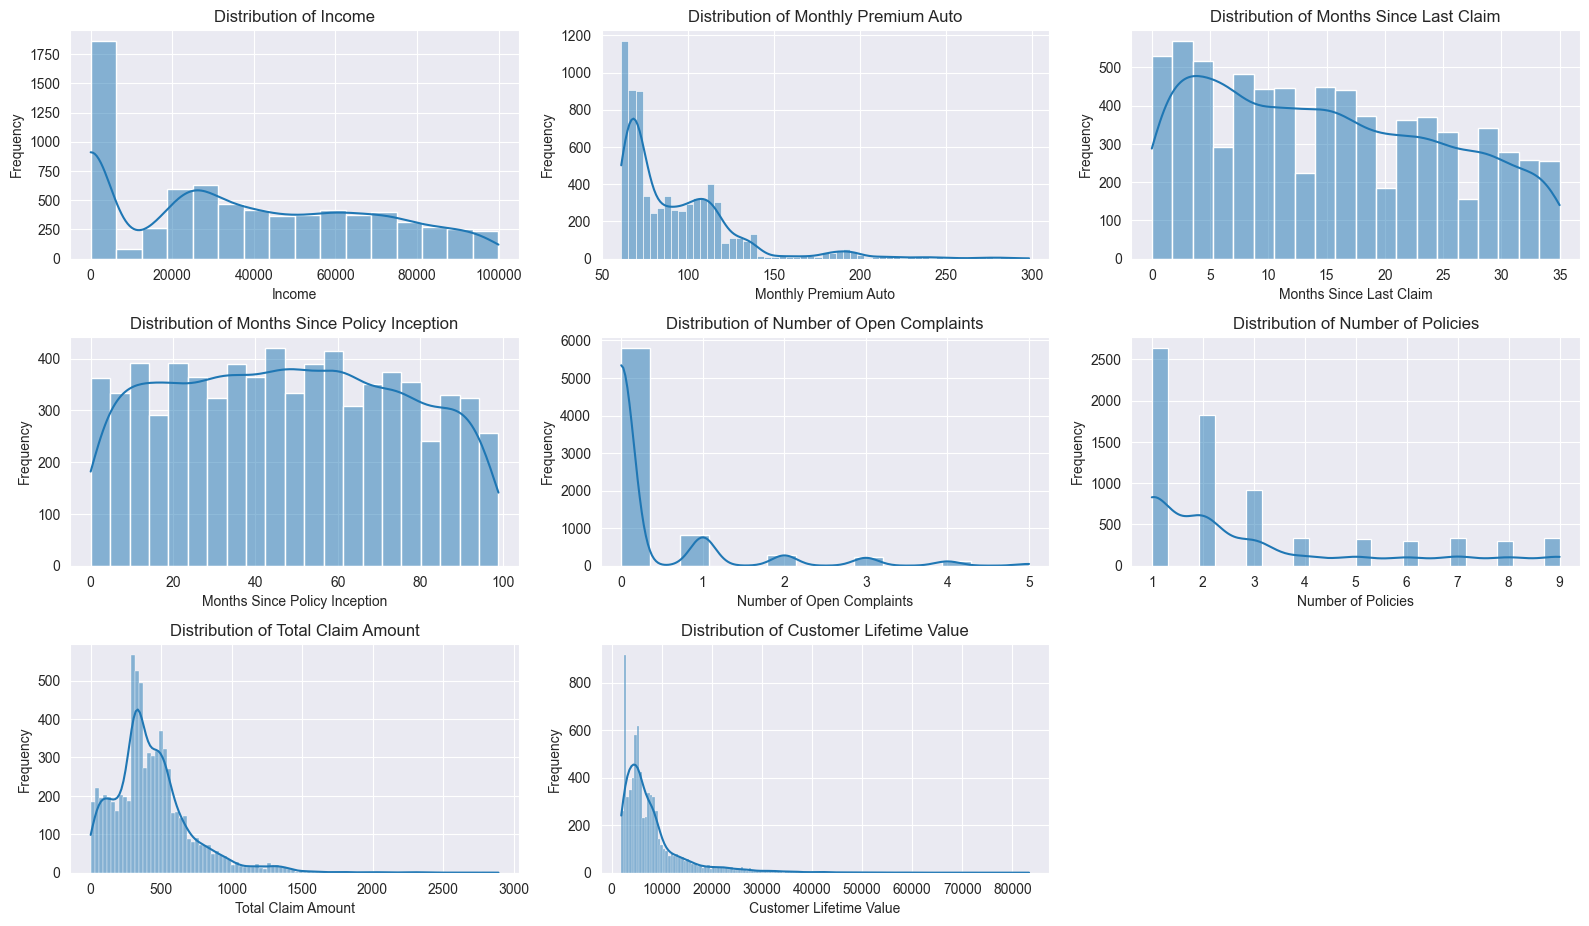

In [39]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot histograms for each numeric column
for i, column in enumerate(numcols, 1):
    plt.subplot(4, 3, i)  # Adjust subplot size based on the number of columns
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
#Assuming df_1 is your DataFrame and numcols are your numerical columns
skewness = df_1[numcols].skew()
kurtosis = df_1[numcols].kurt()

print("Skewness of numeric columns:")
print(skewness)

print("\nKurtosis of numeric columns:")
print(kurtosis)

Skewness of numeric columns:
Income                           0.290080
Monthly Premium Auto             2.129850
Months Since Last Claim          0.433586
Months Since Policy Inception   -0.053739
Number of Open Complaints        2.850240
Number of Policies               1.268776
Total Claim Amount               1.784692
Customer Lifetime Value          3.056497
dtype: float64

Kurtosis of numeric columns:
Income                           -1.095833
Monthly Premium Auto              6.058380
Months Since Last Claim          -0.920443
Months Since Policy Inception    -0.972280
Number of Open Complaints         8.189580
Number of Policies                0.419537
Total Claim Amount                6.399333
Customer Lifetime Value          13.886270
dtype: float64


## Insight from Skewness and Kurtosis of Numeric Columns

### **1. Income**
- **Skewness: 0.290080**
  - The income distribution is slightly **positively skewed**, indicating a mild asymmetry where some customers have higher incomes than the rest of the population.
- **Kurtosis: -1.095833**
  - The income distribution is **platykurtic**, meaning it has a flatter peak and thinner tails than a normal distribution. This suggests that the data has fewer extreme values or outliers than a normal distribution.

**Insight:** The income distribution is relatively symmetrical with few outliers, indicating a stable and broad distribution across the customer base.

---

### **2. Monthly Premium Auto**
- **Skewness: 2.129850**
  - The distribution is **highly positively skewed**, meaning that most customers pay lower premiums, but there are a few who pay significantly higher premiums.
- **Kurtosis: 6.058380**
  - The distribution is **leptokurtic**, indicating a sharp peak and heavy tails. This suggests a higher likelihood of extreme values or outliers in the monthly premium data.

**Insight:** Most customers pay lower auto premiums, but a small number pay much higher premiums, potentially due to premium coverage or additional services. The presence of outliers may indicate high-value customers or those with special insurance needs.

---

### **3. Months Since Last Claim**
- **Skewness: 0.433586**
  - The distribution is **slightly positively skewed**, indicating that most customers have made claims relatively recently, with fewer customers having gone a long time without making a claim.
- **Kurtosis: -0.920443**
  - The distribution is **platykurtic**, indicating fewer extreme values than a normal distribution. This suggests a relatively consistent pattern in the time since the last claim across customers.

**Insight:** The majority of customers have made recent claims, with a fairly consistent distribution and few outliers. This could suggest stable claim behavior across the customer base.

---

### **4. Months Since Policy Inception**
- **Skewness: -0.053739**
  - The distribution is almost **symmetrical**, indicating that the policy durations are evenly distributed across the customer base.
- **Kurtosis: -0.972280**
  - The distribution is **platykurtic**, suggesting that the data has a flat peak and thin tails, with fewer extreme values.

**Insight:** The policy inception times are evenly distributed, with most customers having policies of average duration. There are no significant outliers, indicating stable policy tenure among customers.

---

### **5. Number of Open Complaints**
- **Skewness: 2.850240**
  - The distribution is **highly positively skewed**, indicating that most customers have no open complaints, but a small number have a significantly higher number of complaints.
- **Kurtosis: 8.189580**
  - The distribution is **highly leptokurtic**, meaning there is a sharp peak and heavy tails, indicating the presence of extreme values.

**Insight:** The vast majority of customers have no complaints, but a small number of customers have a high number of complaints. This could point to specific issues affecting a subset of customers, which may require targeted intervention.

---

### **6. Number of Policies**
- **Skewness: 1.268776**
  - The distribution is **positively skewed**, indicating that most customers hold fewer policies, but a few hold a significantly larger number of policies.
- **Kurtosis: 0.419537**
  - The distribution is **close to normal** but slightly leptokurtic, suggesting a moderate concentration around the mean with some outliers.

**Insight:** Most customers hold a small number of policies, but there are some who hold significantly more, which could indicate cross-selling opportunities or a more engaged customer segment.

---

### **7. Total Claim Amount**
- **Skewness: 1.784692**
  - The distribution is **positively skewed**, indicating that while most claims are for smaller amounts, there are a few claims that are significantly higher.
- **Kurtosis: 6.399333**
  - The distribution is **leptokurtic**, suggesting a sharp peak and heavy tails. This indicates the presence of outliers or extreme claim amounts.

**Insight:** Most claims are for smaller amounts, but there are some high-value claims. These outliers could be due to significant incidents or high-value policies.

---

### **8. Customer Lifetime Value (CLV)**
- **Skewness: 3.056497**
  - The distribution is **highly positively skewed**, indicating that while most customers have a lower CLV, there are a few customers with significantly higher lifetime values.
- **Kurtosis: 13.886270**
  - The distribution is **highly leptokurtic**, suggesting a very sharp peak and heavy tails. This indicates a concentration of CLV around the mean with some extreme outliers.

**Insight:** Most customers contribute moderately to the company’s lifetime value, but there are a few customers with extremely high lifetime values. These high-value customers could be critical to the company’s profitability and may require special attention or tailored services.

---

### **Overall Summary**
- The data shows various degrees of skewness and kurtosis, indicating that some features have significant outliers and are not normally distributed.
- **Positively skewed distributions** (such as Monthly Premium Auto, Number of Open Complaints, Total Claim Amount, and CLV) suggest that most customers fall within a lower range, with a few outliers at the higher end.
- **Leptokurtic distributions** in features like Monthly Premium Auto, Number of Open Complaints, and CLV indicate that while most data points cluster around the mean, there are extreme values that could heavily influence the overall analysis.

These insights suggest a need for careful handling of outliers, possibly through transformations or segmentation, to ensure accurate analysis and modeling.


In [41]:
numerical = numcols.copy()

def calculate_outliers(df_1, feature):
    Q1 = df_1[feature].quantile(0.25)
    Q3 = df_1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = df_1[(df_1[feature] < lower_bound) | (df_1[feature] > upper_bound)]

    return outliers, lower_bound, upper_bound

def get_outlier_data(df_1):
    outlier_data = []

    for i in numerical:
        outliers_result, lower_bound, upper_bound = calculate_outliers(df_1, i)
        total_outlier = len(outliers_result)
        outlier_percentage = round(total_outlier / len(df_1[i]) * 100, 2)
        outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])

    outlier_df_1 = pd.DataFrame(outlier_data, columns=[
        'Feature', 'Total Outliers', 'Percentage (%)', 'Lower Bound (IQR)', 'Upper Bound (IQR)'
    ])
    
    return outlier_df_1

# Call the function to get the outliers data
outlier_df_1 = get_outlier_data(df_1)

# Display the DataFrame
outlier_df_1

Feature  Total Outliers  Percentage (%)  \
0                         Income               0            0.00   
1           Monthly Premium Auto             318            5.20   
2        Months Since Last Claim               0            0.00   
3  Months Since Policy Inception               0            0.00   
4      Number of Open Complaints            1255           20.53   
5             Number of Policies             286            4.68   
6             Total Claim Amount             319            5.22   
7        Customer Lifetime Value             544            8.90   

   Lower Bound (IQR)  Upper Bound (IQR)  
0      -93696.000000      156160.000000  
1           9.000000         169.000000  
2         -19.000000          45.000000  
3         -22.500000         133.500000  
4           0.000000           0.000000  
5          -3.500000           8.500000  
6        -138.916083         958.869650  
7       -3544.798017       16412.013682

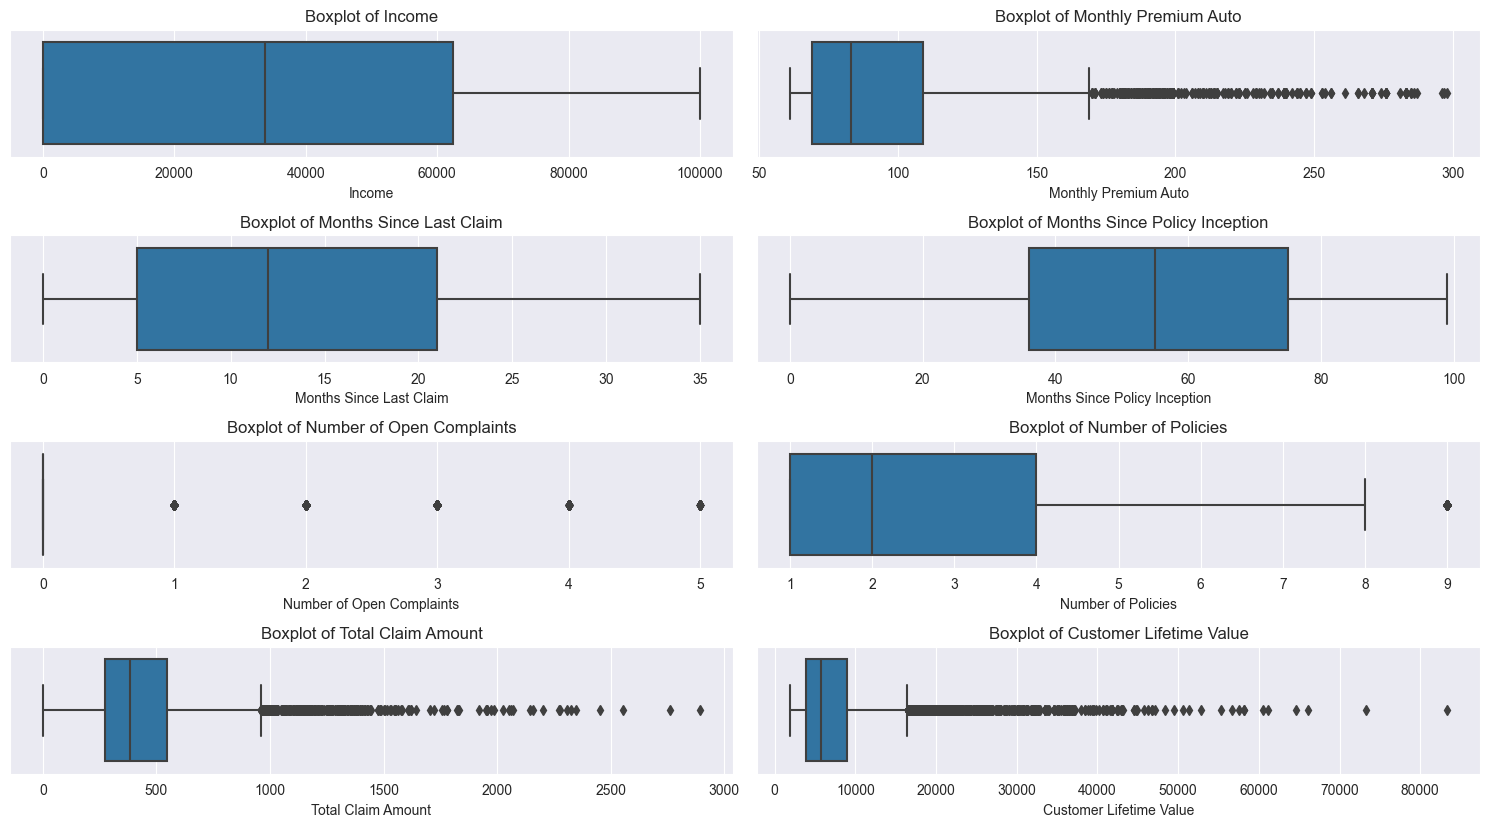

In [42]:
# Plotting the boxplots for each numerical feature to visualize outliers
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical):
    plt.subplot(len(numerical) // 2 + 1, 2, i + 1)
    sns.boxplot(data=df_1, x=feature)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

## **Customer Lifetime Value Log**

Skewness after Log Transformation: 0.5884202608690405


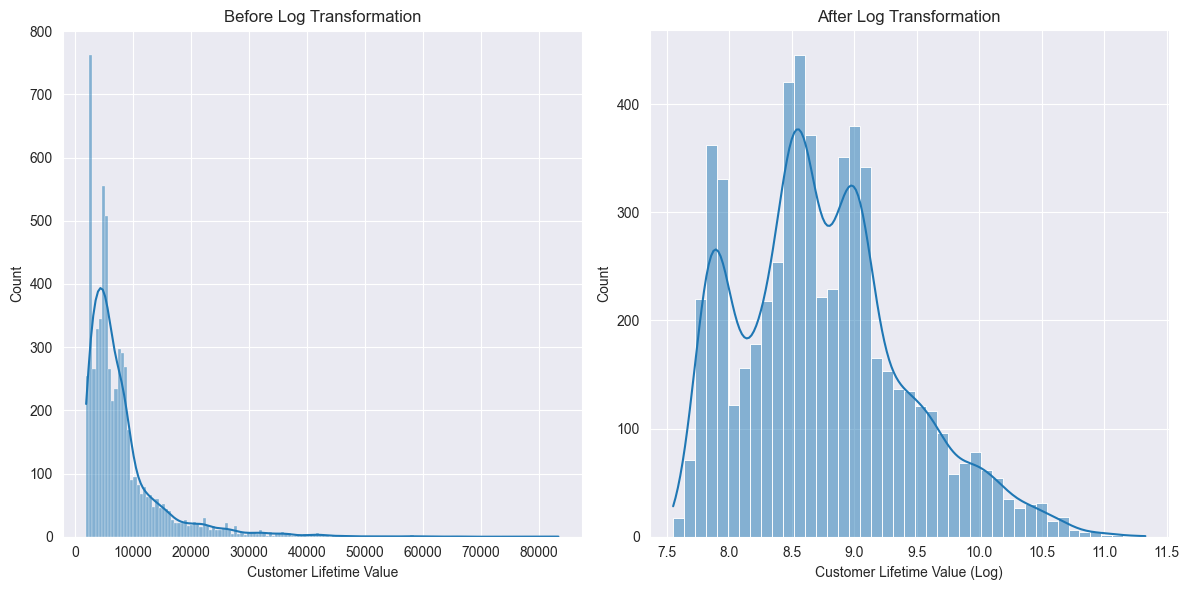

In [43]:
# Log Transformation
df_1['Customer Lifetime Value (Log)'] = np.log(df_1['Customer Lifetime Value'] + 1)

# Checking the skewness after transformation
log_skewness = df_1['Customer Lifetime Value (Log)'].skew()
print(f"Skewness after Log Transformation: {log_skewness}")

# Visualize the distribution after log transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_1['Customer Lifetime Value'], kde=True)
plt.title('Before Log Transformation')

plt.subplot(1, 2, 2)
sns.histplot(df_1['Customer Lifetime Value (Log)'], kde=True)
plt.title('After Log Transformation')

plt.tight_layout()
plt.show()

Total Outliers after Log Transformation: 126
Percentage of Outliers: 2.06%


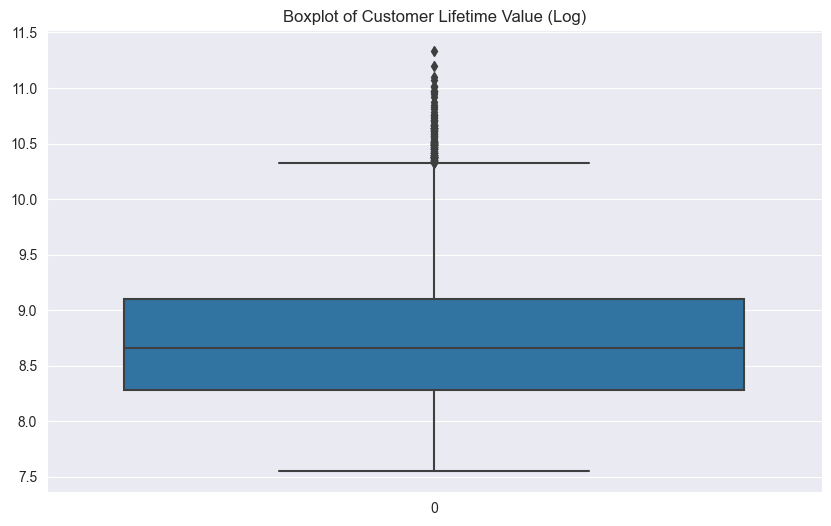

In [44]:
# Calculate IQR for the transformed CLV
Q1 = df_1['Customer Lifetime Value (Log)'].quantile(0.25)
Q3 = df_1['Customer Lifetime Value (Log)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df_1[(df_1['Customer Lifetime Value (Log)'] < lower_bound) | 
                (df_1['Customer Lifetime Value (Log)'] > upper_bound)]

total_outliers = outliers.shape[0]
outlier_percentage = (total_outliers / df_1.shape[0]) * 100

print(f"Total Outliers after Log Transformation: {total_outliers}")
print(f"Percentage of Outliers: {outlier_percentage:.2f}%")

# Visualize the boxplot to check outliers after transformation
plt.figure(figsize=(10, 6))
sns.boxplot(df_1['Customer Lifetime Value (Log)'])
plt.title('Boxplot of Customer Lifetime Value (Log)')
plt.show()

Initial Skewness: 3.056496788978642
Skewness after Log Transformation: 0.5884202608690405


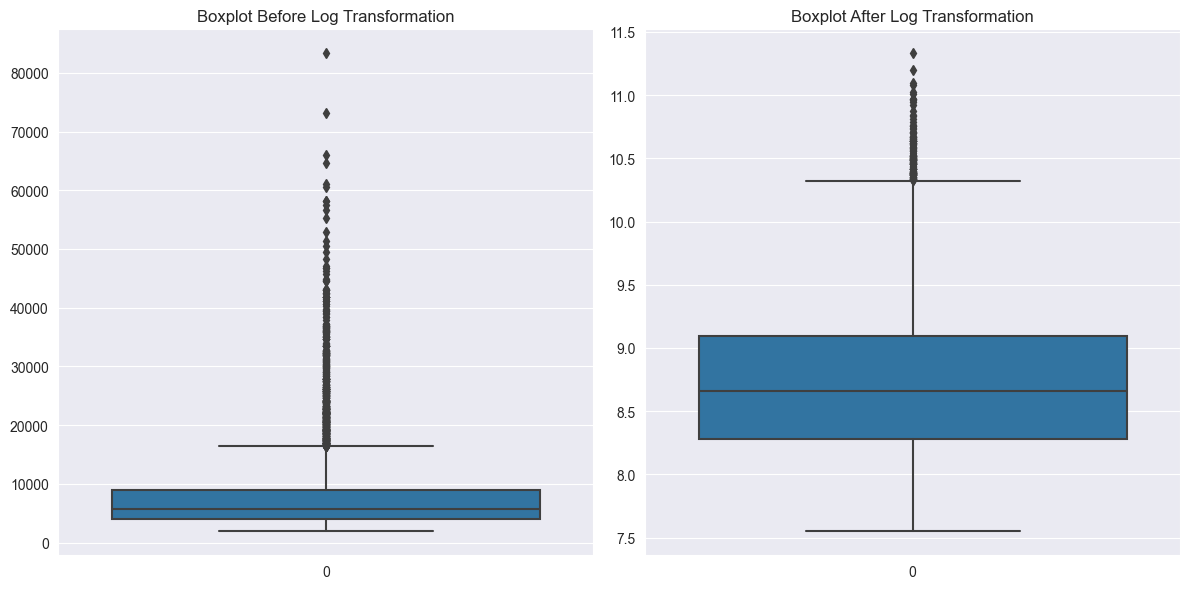

In [45]:
# Compare skewness before and after transformation
initial_skewness = df_1['Customer Lifetime Value'].skew()
log_skewness = df_1['Customer Lifetime Value (Log)'].skew()

print(f"Initial Skewness: {initial_skewness}")
print(f"Skewness after Log Transformation: {log_skewness}")

# Visualizing the comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(df_1['Customer Lifetime Value'])
plt.title('Boxplot Before Log Transformation')

plt.subplot(1, 2, 2)
sns.boxplot(df_1['Customer Lifetime Value (Log)'])
plt.title('Boxplot After Log Transformation')

plt.tight_layout()
plt.show()

## **Monthly Premium Auto Log**

Skewness after Square Root Transformation: 1.0205075929732303


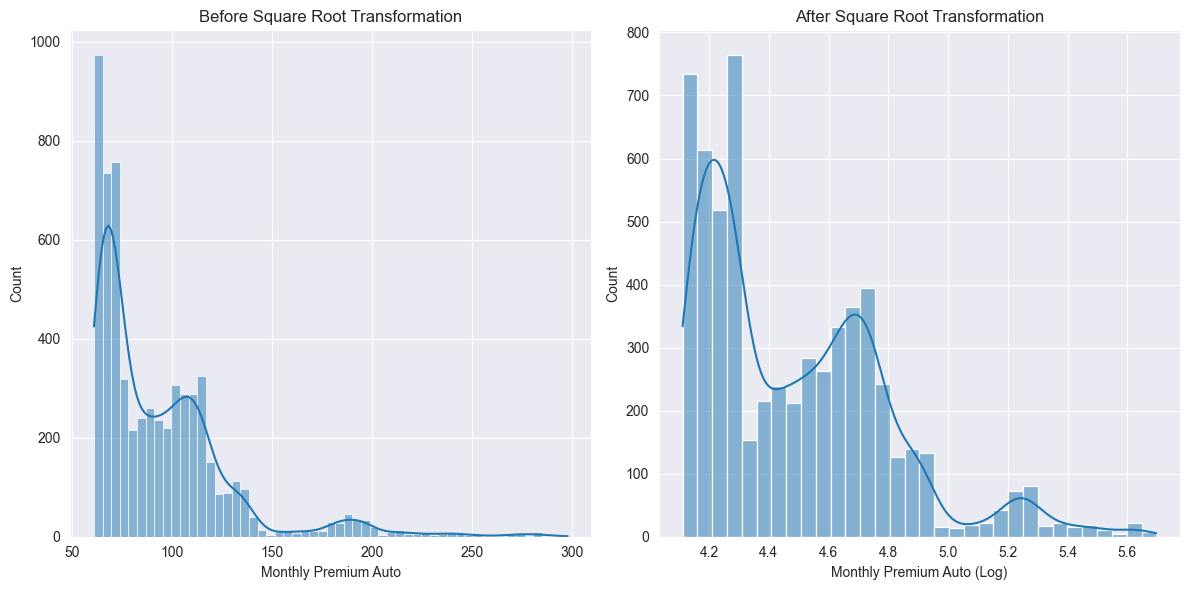

In [47]:
# Log Transformation
df_1['Monthly Premium Auto (Log)'] = np.log(df_1['Monthly Premium Auto'])

# Checking the skewness after transformation
log_skewness = df_1['Monthly Premium Auto (Log)'].skew()
print(f"Skewness after Square Root Transformation: {log_skewness}")

# Visualize the distribution after square root transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_1['Monthly Premium Auto'], kde=True)
plt.title('Before Square Root Transformation')

plt.subplot(1, 2, 2)
sns.histplot(df_1['Monthly Premium Auto (Log)'], kde=True)
plt.title('After Square Root Transformation')

plt.tight_layout()
plt.show()

Total Outliers after Square Root Transformation: 84
Percentage of Outliers: 1.37%


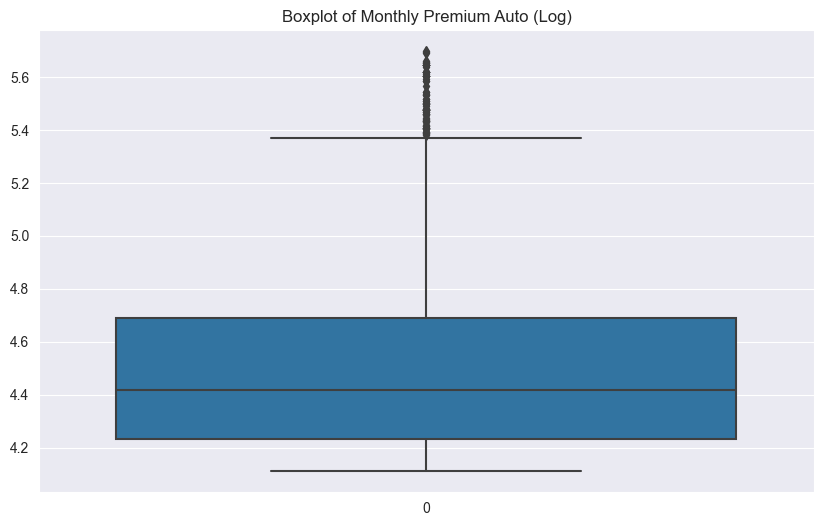

In [ ]:
# Calculate IQR for the transformed Monthly Premium Auto
Q1 = df_1['Monthly Premium Auto (Log)'].quantile(0.25)
Q3 = df_1['Monthly Premium Auto (Log)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df_1[(df_1['Monthly Premium Auto (Log)'] < lower_bound) | 
                (df_1['Monthly Premium Auto (Log)'] > upper_bound)]

total_outliers = outliers.shape[0]
outlier_percentage = (total_outliers / df_1.shape[0]) * 100

print(f"Total Outliers after Square Root Transformation: {total_outliers}")
print(f"Percentage of Outliers: {outlier_percentage:.2f}%")

# Visualize the boxplot to check outliers after transformation
plt.figure(figsize=(10, 6))
sns.boxplot(df_1['Monthly Premium Auto (Log)'])
plt.title('Boxplot of Monthly Premium Auto (Log)')
plt.show()

Initial Skewness: 2.1298502195994162
Skewness after Log Transformation: 1.0205075929732303


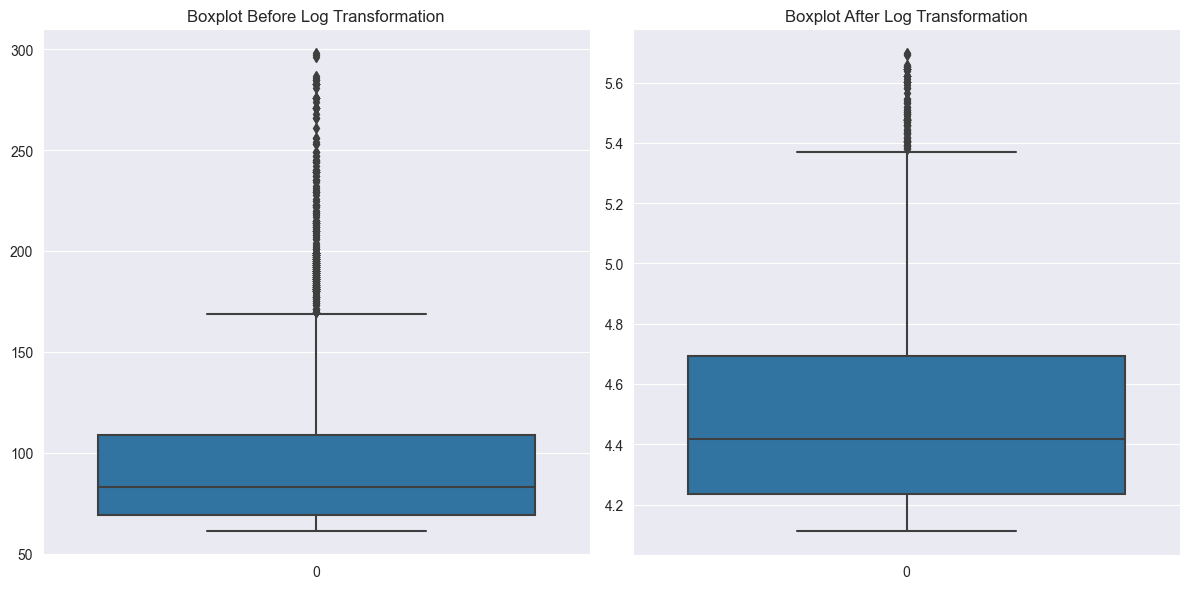

In [48]:
# Compare skewness before and after transformation
initial_skewness_premiumauto = df_1['Monthly Premium Auto'].skew()
log_skewness_premiumauto = df_1['Monthly Premium Auto (Log)'].skew()

print(f"Initial Skewness: {initial_skewness_premiumauto}")
print(f"Skewness after Log Transformation: {log_skewness_premiumauto}")

# Visualizing the comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(df_1['Monthly Premium Auto'])
plt.title('Boxplot Before Log Transformation')

plt.subplot(1, 2, 2)
sns.boxplot(df_1['Monthly Premium Auto (Log)'])
plt.title('Boxplot After Log Transformation')

plt.tight_layout()
plt.show()

## **Total Claim Amount (Log)**

Initial Skewness: 1.784691828821107
Skewness after Log Transformation: -1.7528266032648572


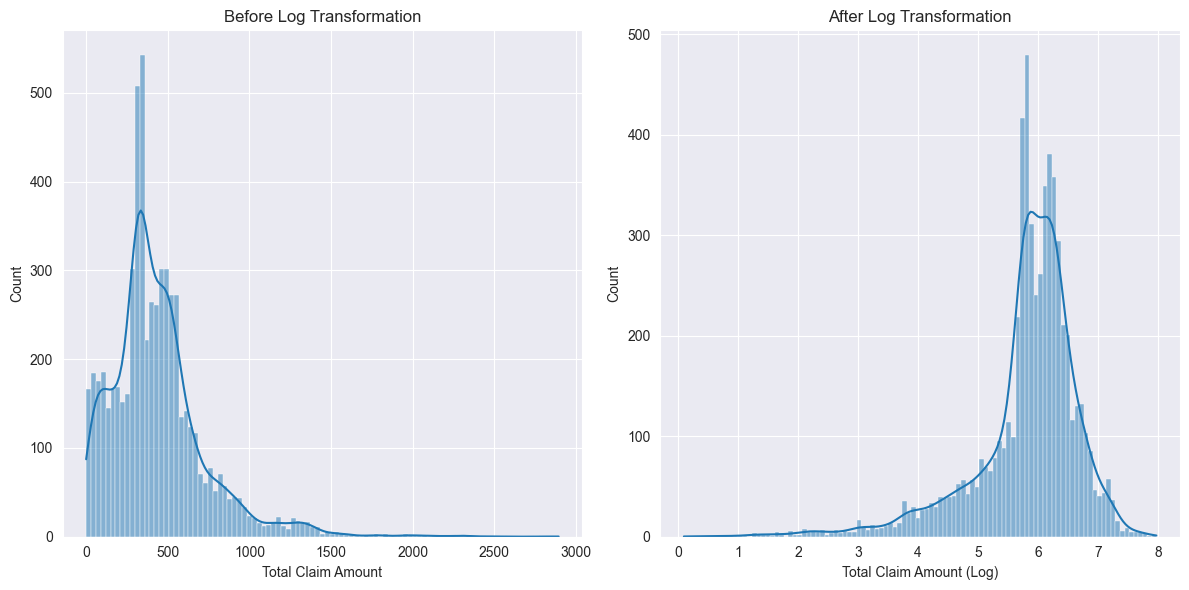

In [49]:
# Log Transformation
df_1['Total Claim Amount (Log)'] = np.log(df_1['Total Claim Amount'] + 1)

# Checking the skewness after transformation
initial_skewness_claim = df_1['Total Claim Amount'].skew()
log_skewness_claim = df_1['Total Claim Amount (Log)'].skew()
print(f"Initial Skewness: {initial_skewness_claim}")
print(f"Skewness after Log Transformation: {log_skewness_claim}")

# Visualize the distribution after log transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_1['Total Claim Amount'], kde=True)
plt.title('Before Log Transformation')

plt.subplot(1, 2, 2)
sns.histplot(df_1['Total Claim Amount (Log)'], kde=True)
plt.title('After Log Transformation')

plt.tight_layout()
plt.show()

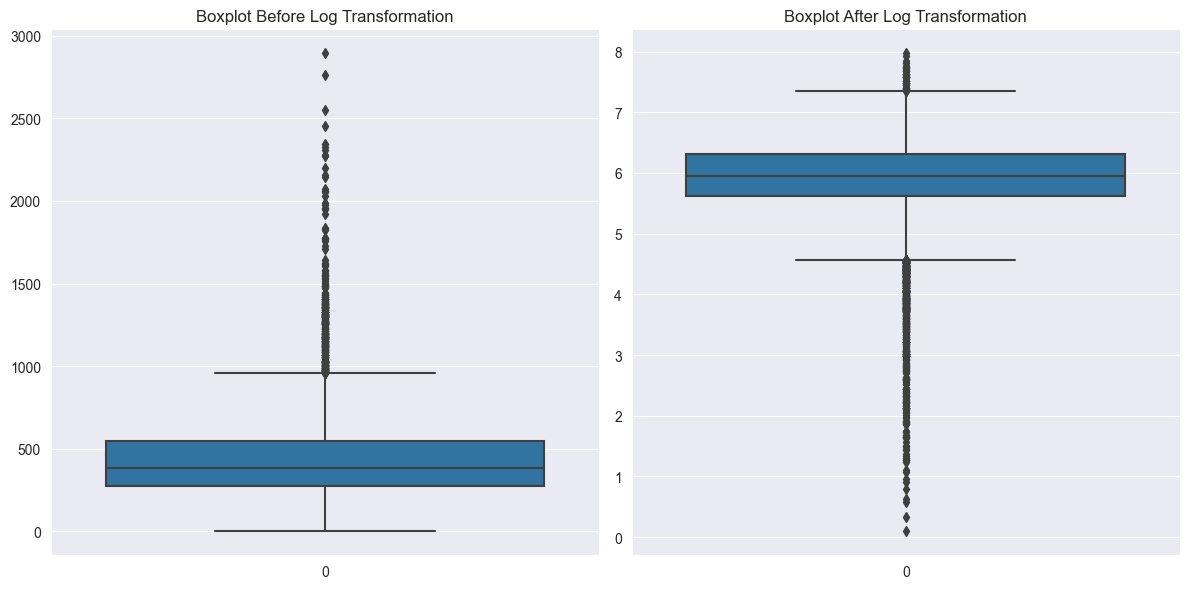

In [50]:
# Visualizing the comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(df_1['Total Claim Amount'])
plt.title('Boxplot Before Log Transformation')

plt.subplot(1, 2, 2)
sns.boxplot(df_1['Total Claim Amount (Log)'])
plt.title('Boxplot After Log Transformation')

plt.tight_layout()
plt.show()

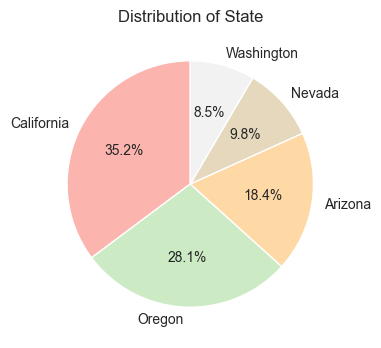

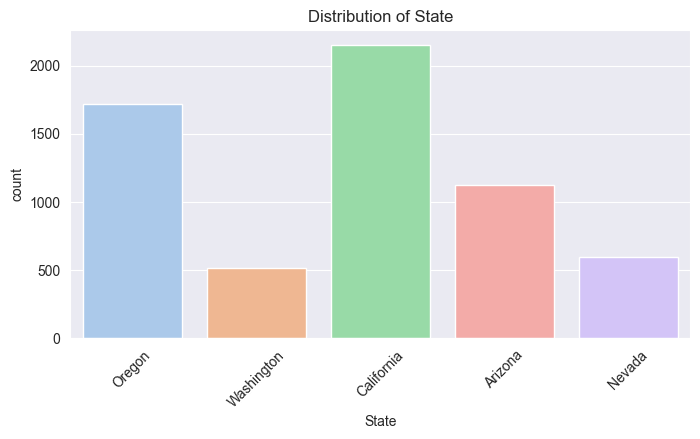

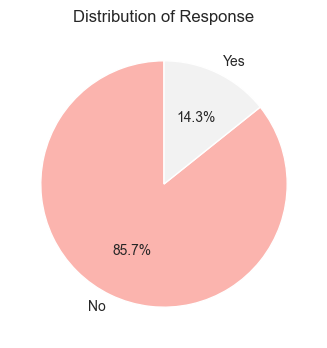

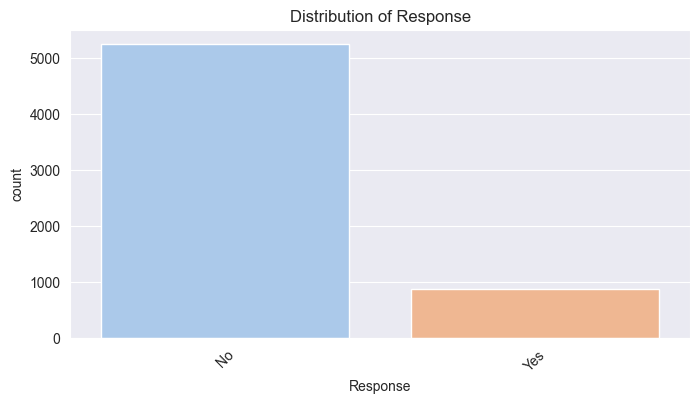

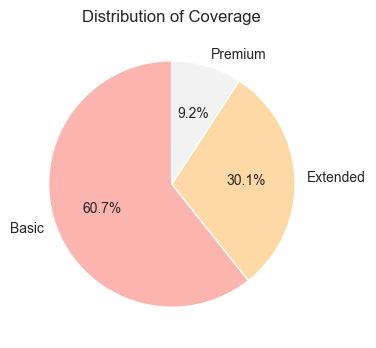

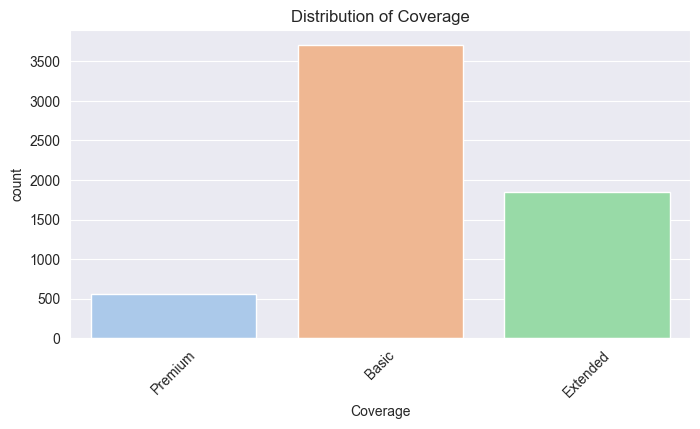

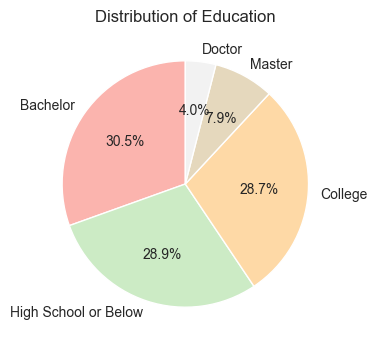

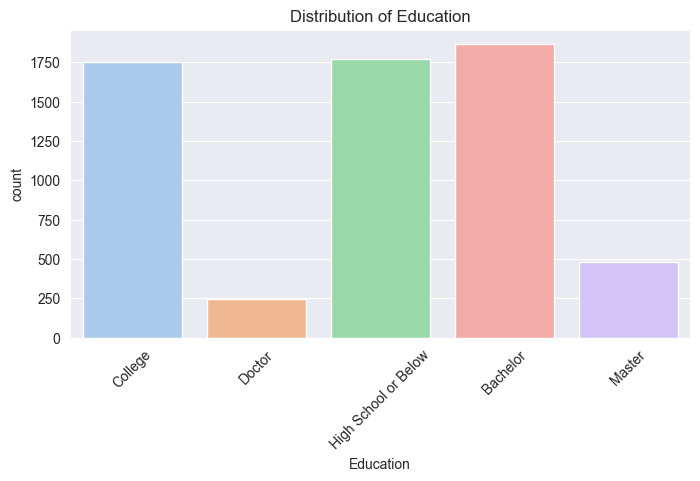

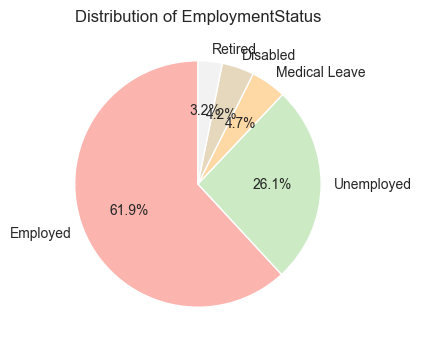

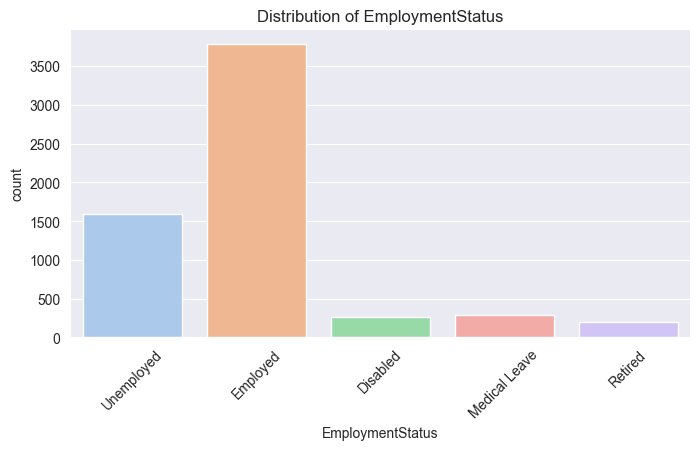

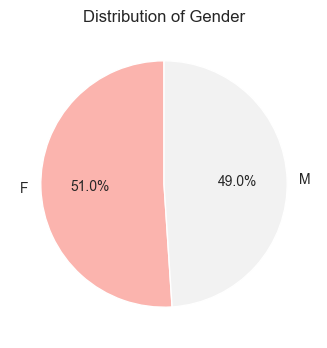

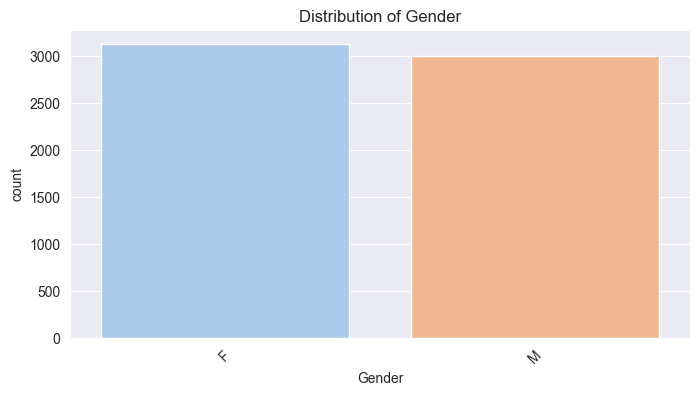

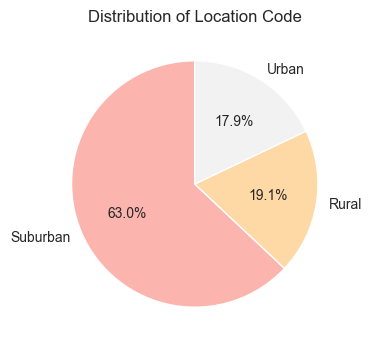

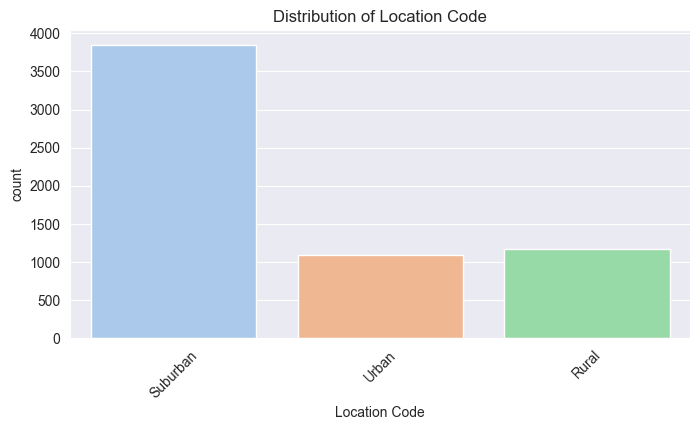

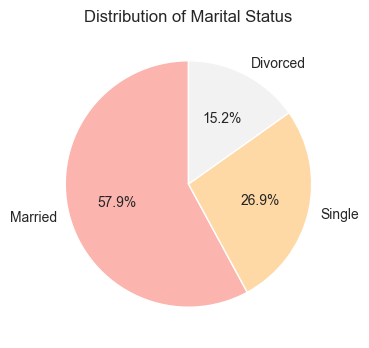

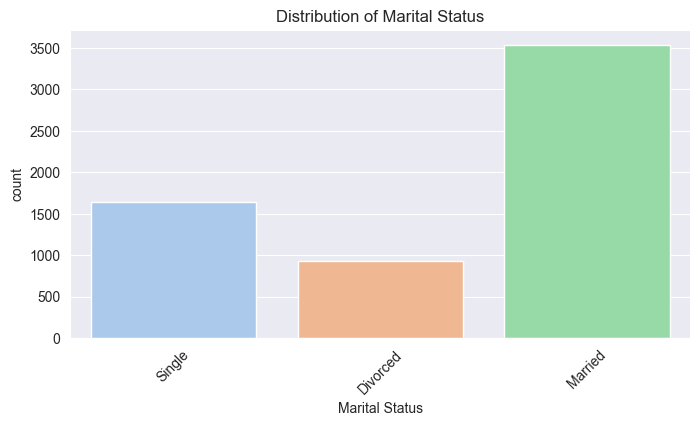

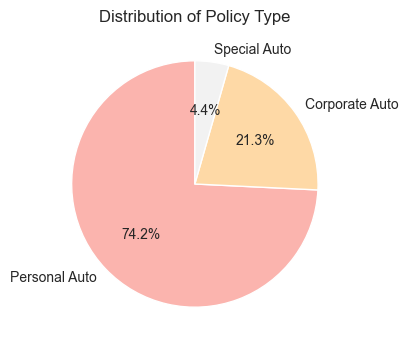

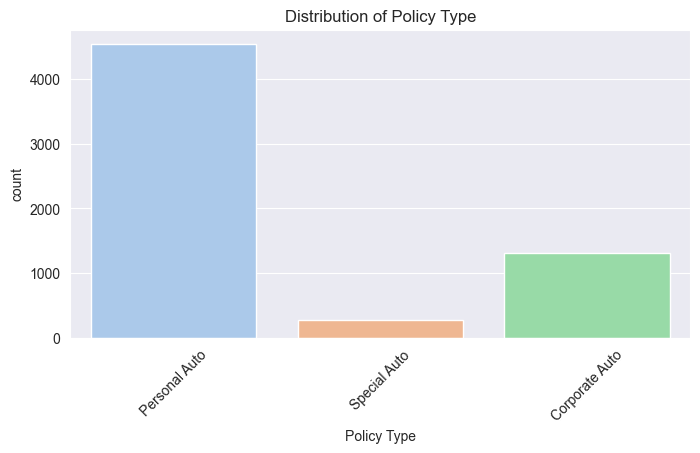

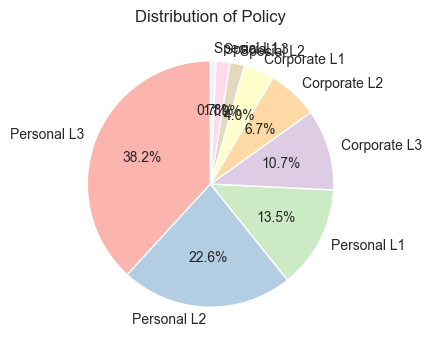

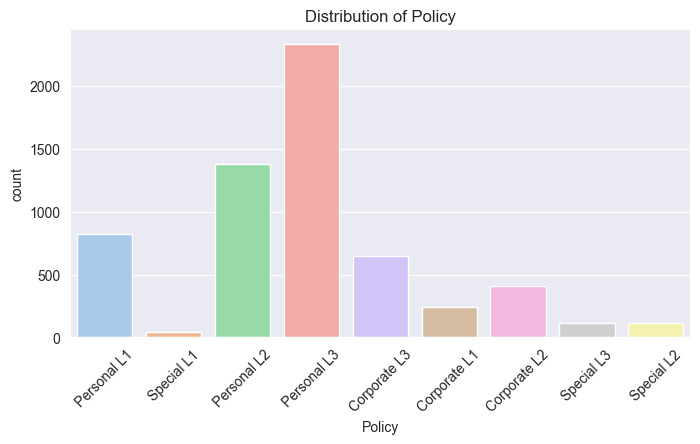

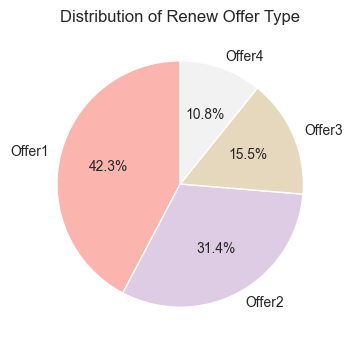

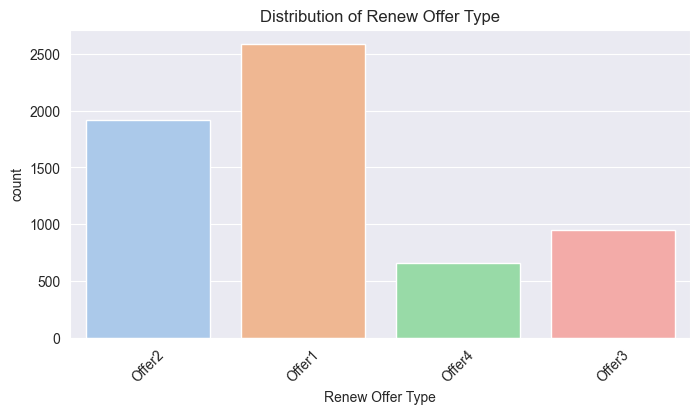

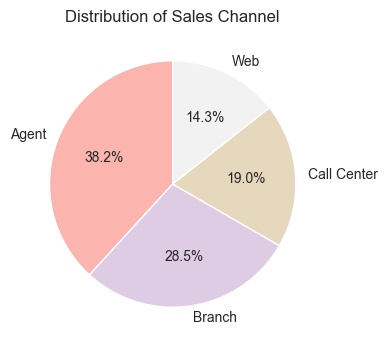

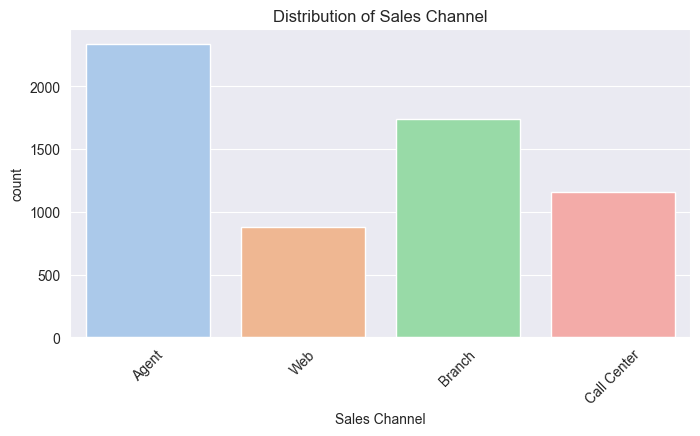

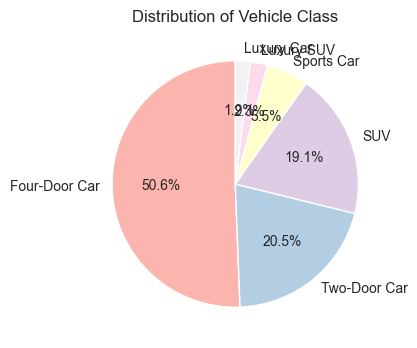

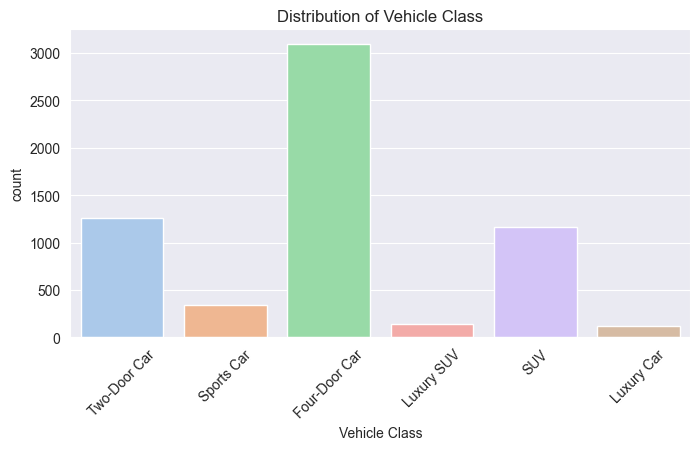

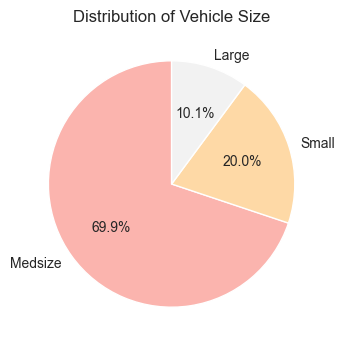

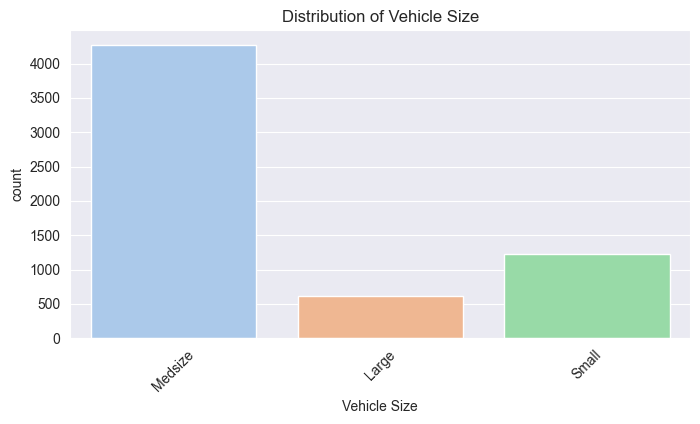

In [62]:
# Univariate Analysis
# Exclude high cardinality columns like 'Customer'
filtered_catcols = [col for col in catcols if df_1[col].nunique() < 20]

for col in filtered_catcols:
    # Pie Chart
    plt.figure(figsize=(8, 4))
    df_1[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1')
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.show()

    # Bar Plot
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df_1, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

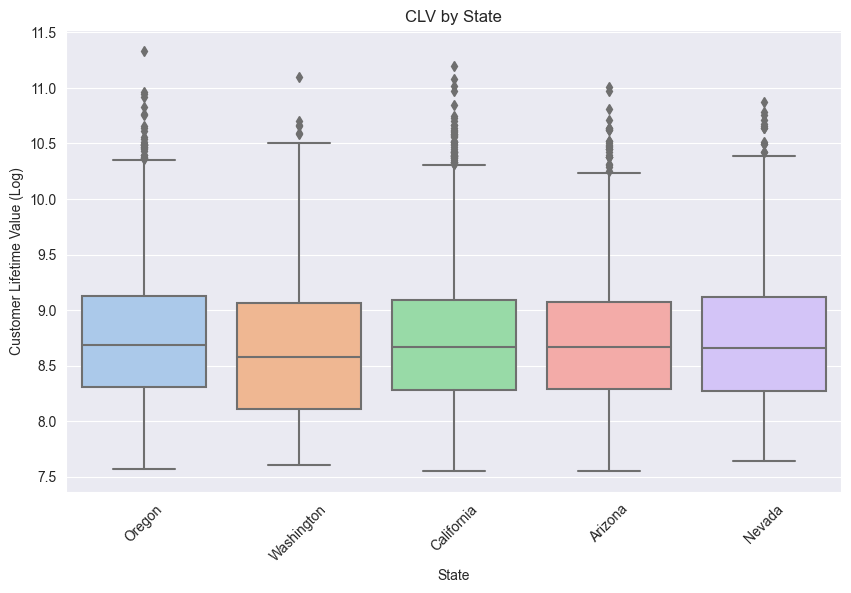

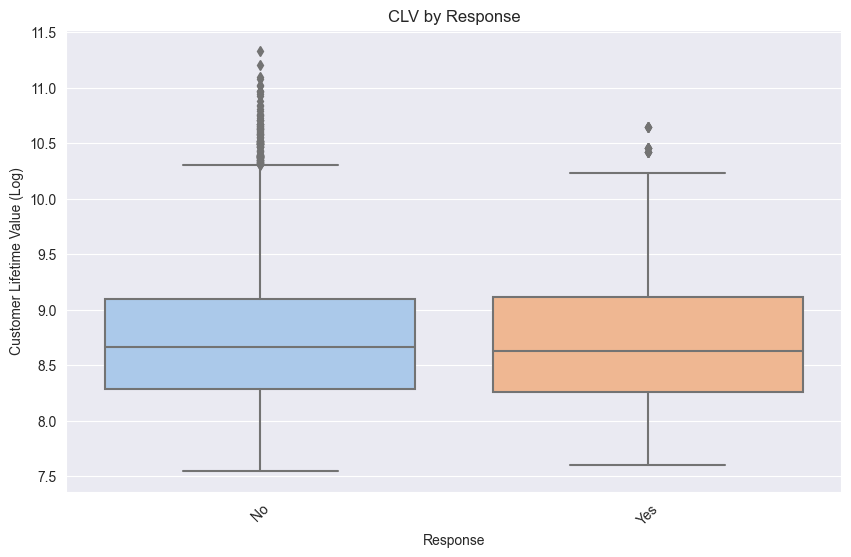

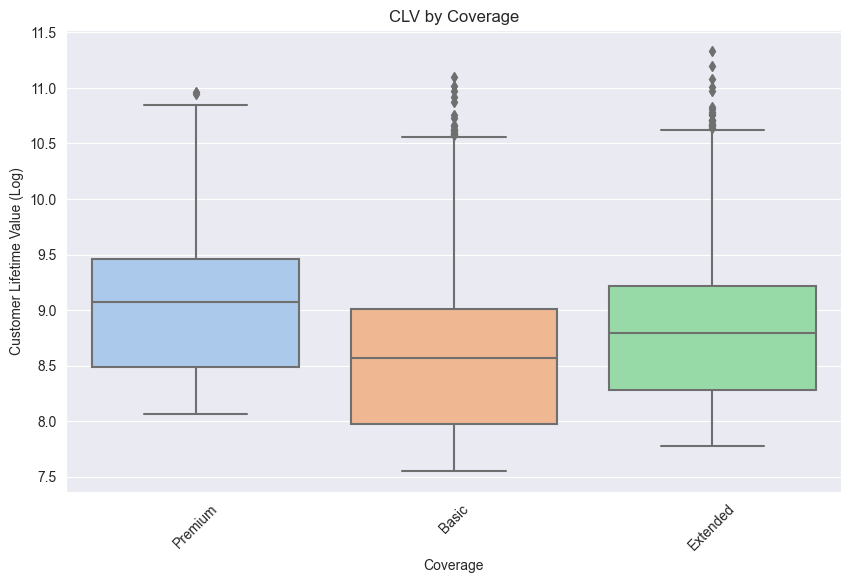

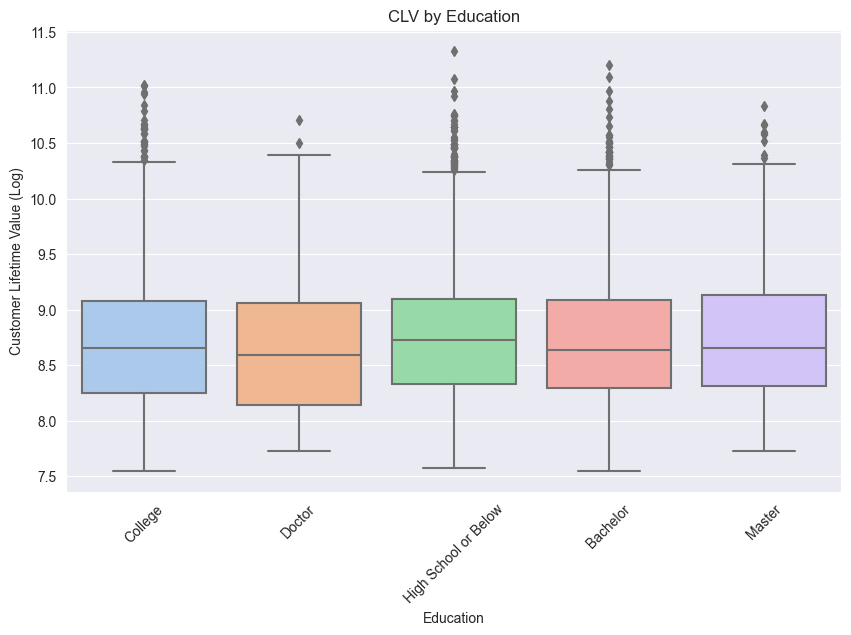

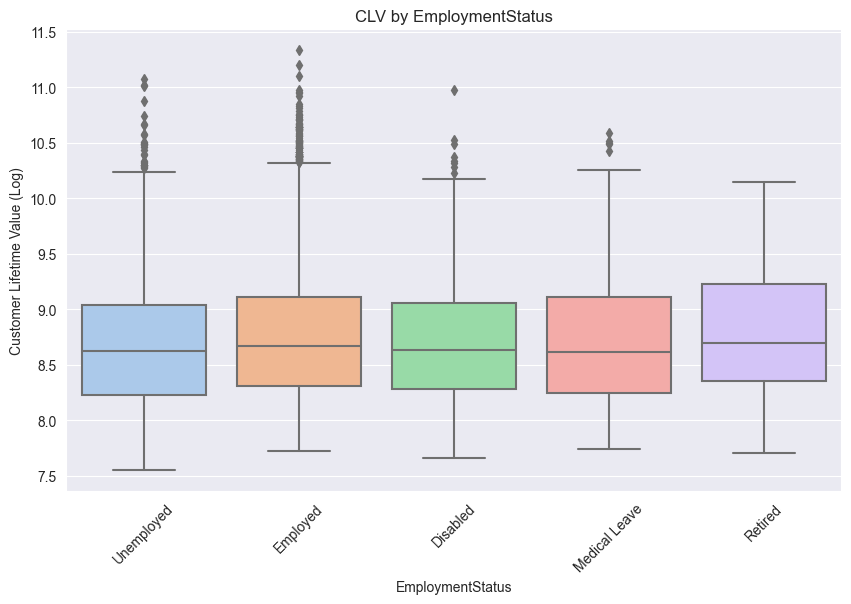

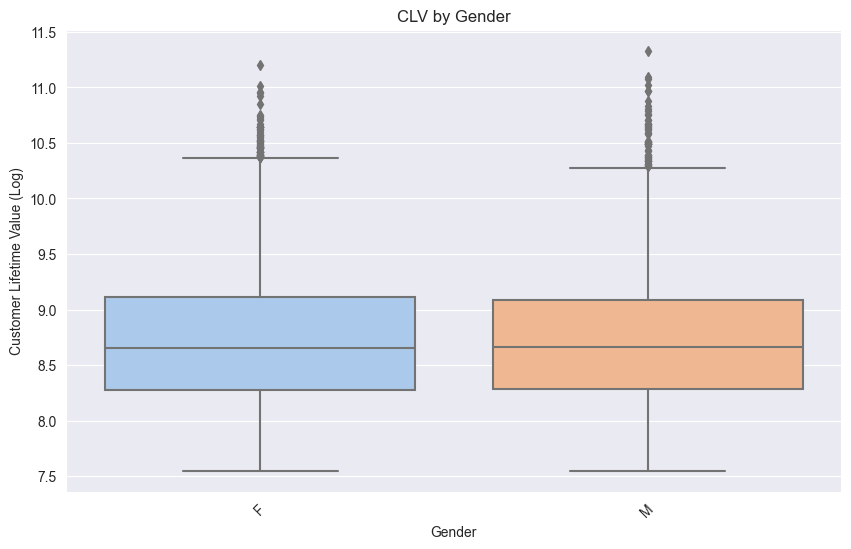

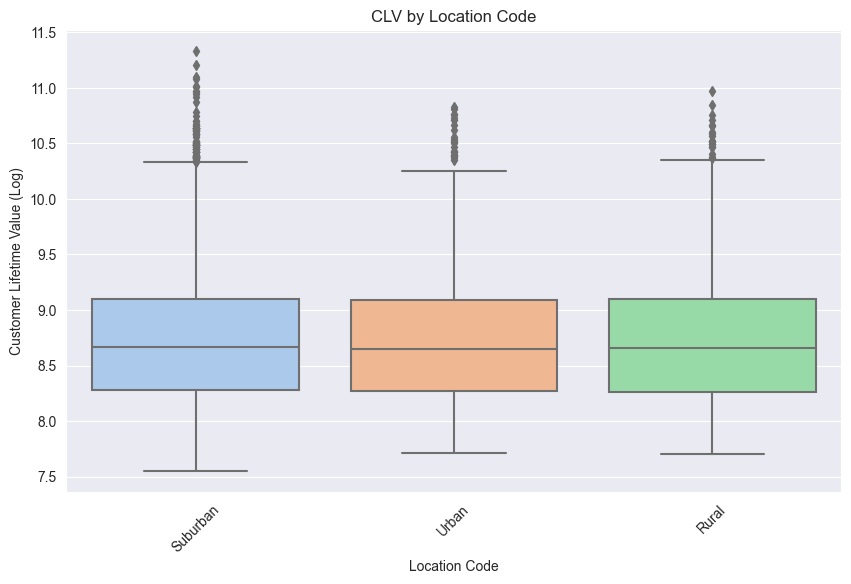

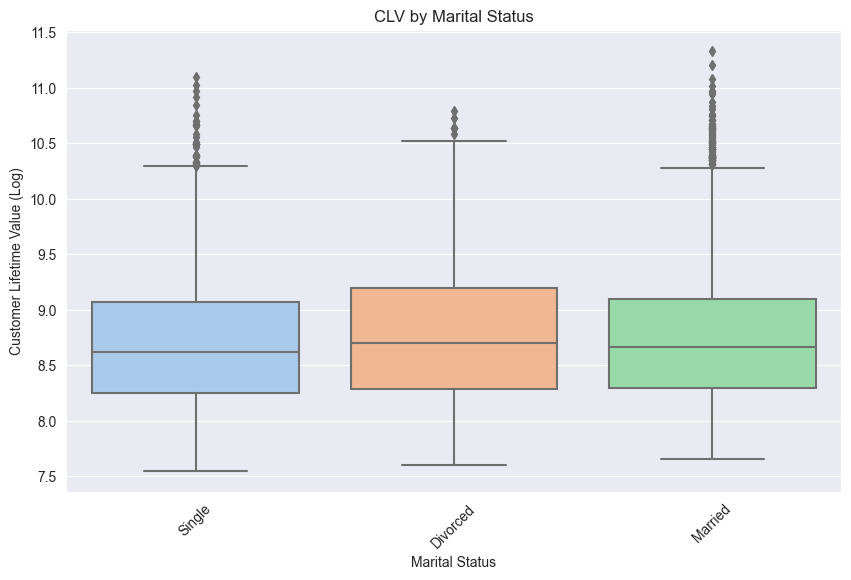

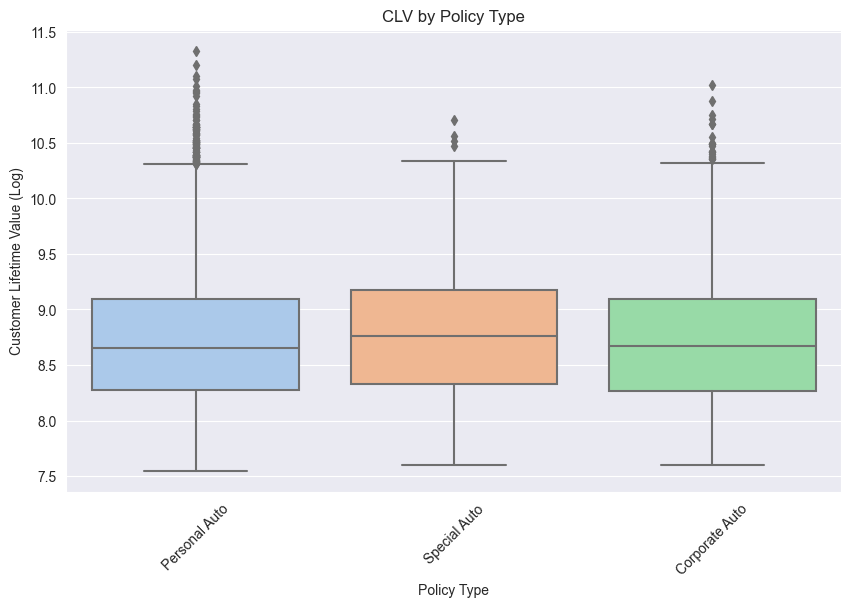

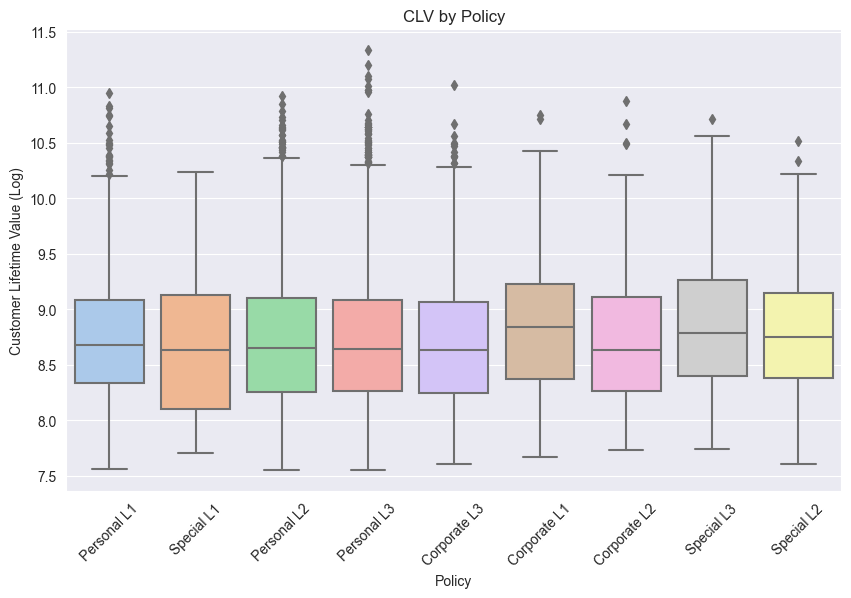

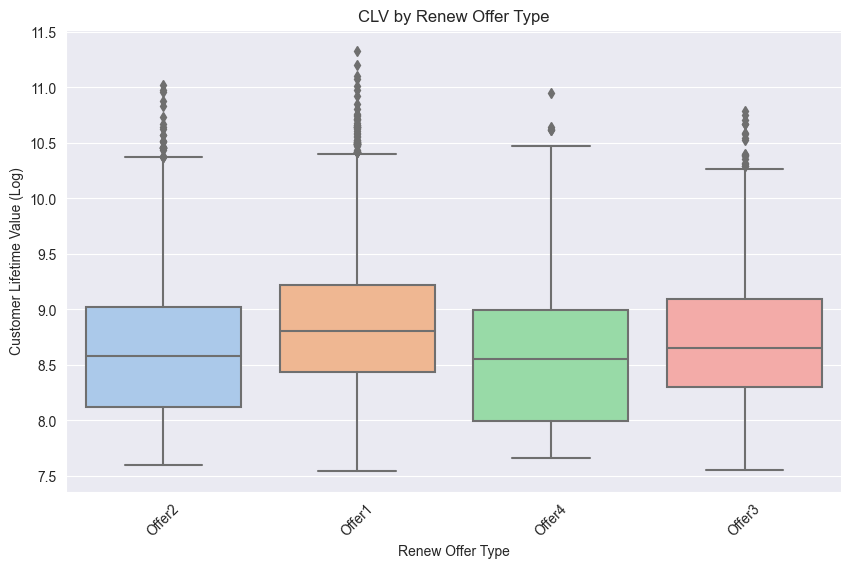

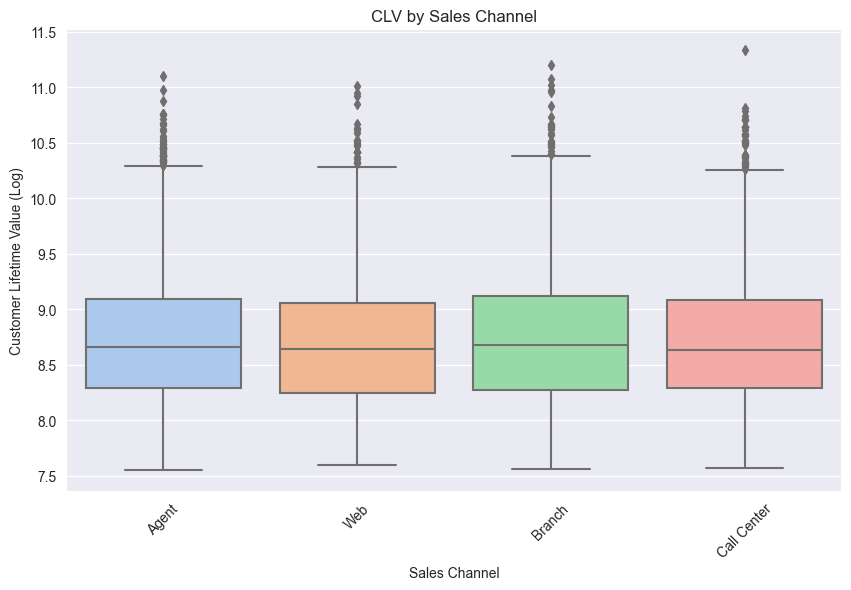

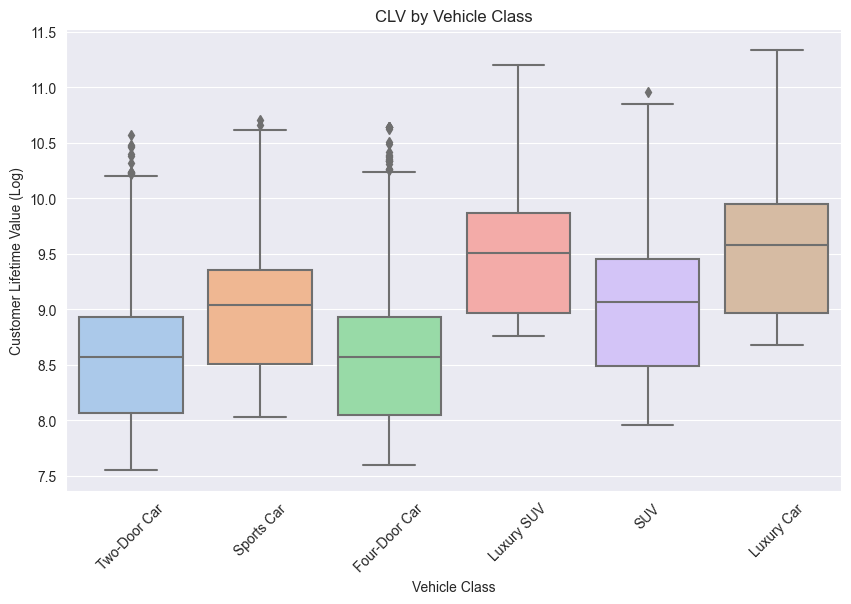

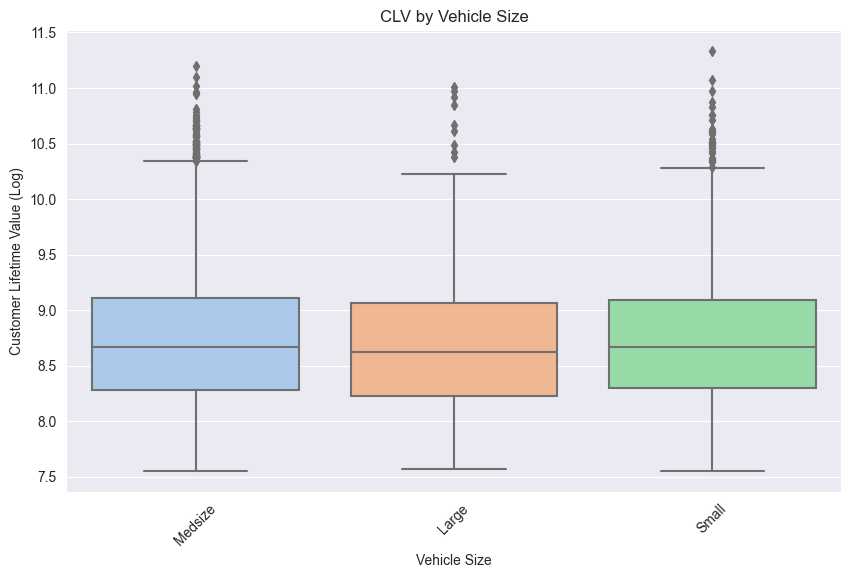

In [52]:
# Boxplot to see distribution of CLV within each filtered categorical feature
for col in filtered_catcols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Customer Lifetime Value (Log)', data=df_1, palette='pastel')
    plt.title(f'CLV by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [54]:
# Select numeric features for VIF calculation
numeric_features = df_1.select_dtypes(include=[np.number]).columns
X = df_1[numeric_features]

# Adding a constant to the model (required for VIF)
X = add_constant(X)

# Calculating VIF
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF
print(vif)

                          Feature          VIF
0                           const  3011.901488
1                          Income     1.266070
2            Monthly Premium Auto    22.680684
3         Months Since Last Claim     1.028194
4   Months Since Policy Inception     1.024750
5       Number of Open Complaints     1.003709
6              Number of Policies     1.227582
7              Total Claim Amount     5.009173
8         Customer Lifetime Value     6.053620
9   Customer Lifetime Value (Log)     6.897688
10     Monthly Premium Auto (Log)    21.289126
11       Total Claim Amount (Log)     3.213471


In [60]:
# Ensure the 'Monthly Premium Auto' column is removed
df_modified = df_1.copy()
df_modified.drop(columns=['Monthly Premium Auto','Customer Lifetime Value','Total Claim Amount'], inplace=True)

In [61]:
# Select numeric features for VIF calculation, now excluding 'Monthly Premium Auto'
numeric_features_modified = df_modified.select_dtypes(include=[np.number]).columns
X_modified = df_modified[numeric_features_modified]

# Adding a constant to the model (required for VIF)
X_modified = add_constant(X_modified)

# Calculating VIF
vif_modified = pd.DataFrame()
vif_modified['Feature'] = X_modified.columns
vif_modified['VIF'] = [variance_inflation_factor(X_modified.values, i) for i in range(X_modified.shape[1])]

# Display the new VIF values
print(vif_modified)

                         Feature         VIF
0                          const  271.480375
1                         Income    1.167505
2        Months Since Last Claim    1.026610
3  Months Since Policy Inception    1.024406
4      Number of Open Complaints    1.003402
5             Number of Policies    1.059863
6  Customer Lifetime Value (Log)    1.374131
7     Monthly Premium Auto (Log)    1.522213
8       Total Claim Amount (Log)    1.368806


Interpretation:
Multicollinearity is now minimal: With VIF values all below 2.0, your model is unlikely to suffer from issues related to multicollinearity. This means that the coefficients of your regression model will be more stable and interpretable.
Successful feature selection: By removing the original versions of Customer Lifetime Value and Total Claim Amount, you've ensured that your model works with features that are less skewed and exhibit lower multicollinearity.

# Identify all categorical columns

In [63]:
categorical_columns = df_1.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


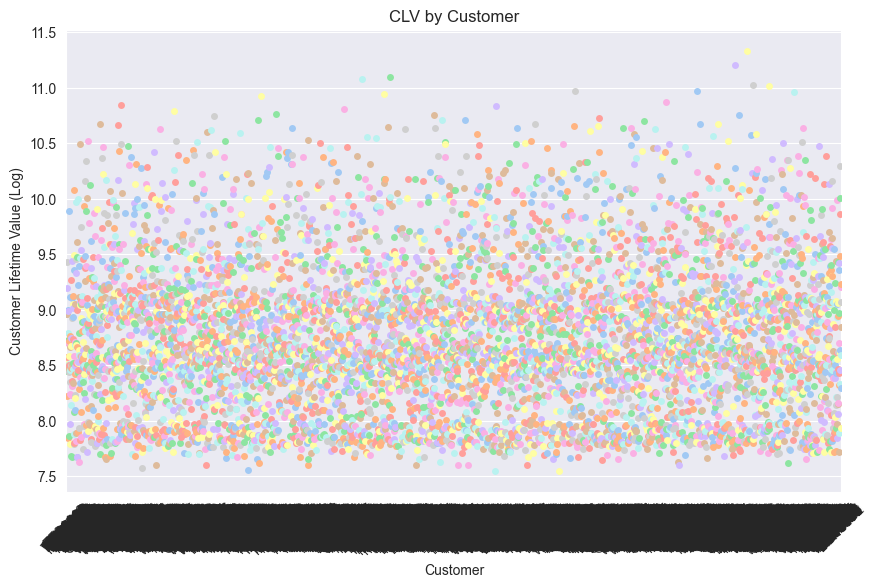

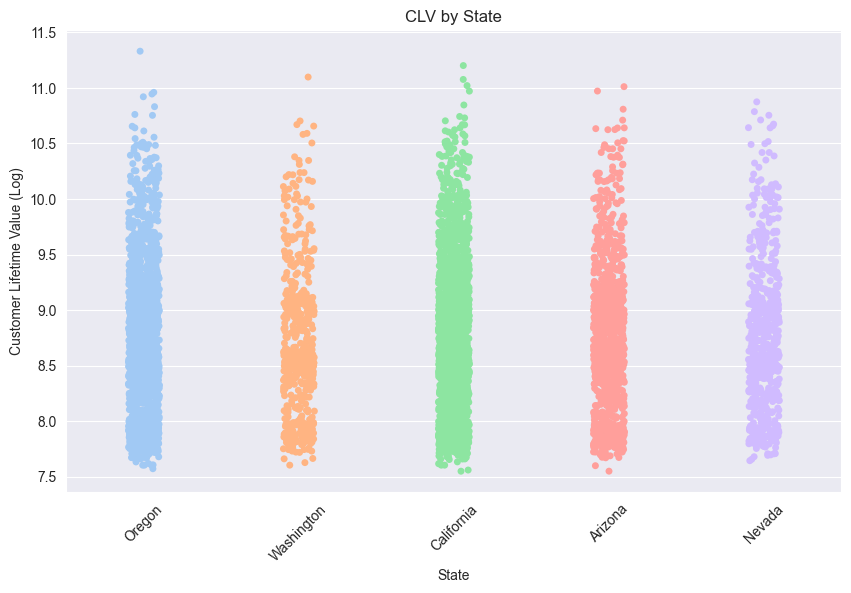

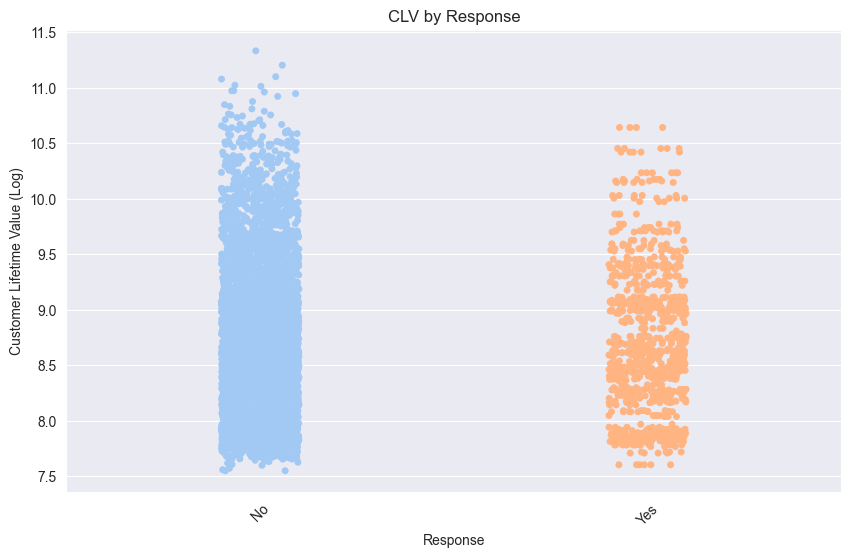

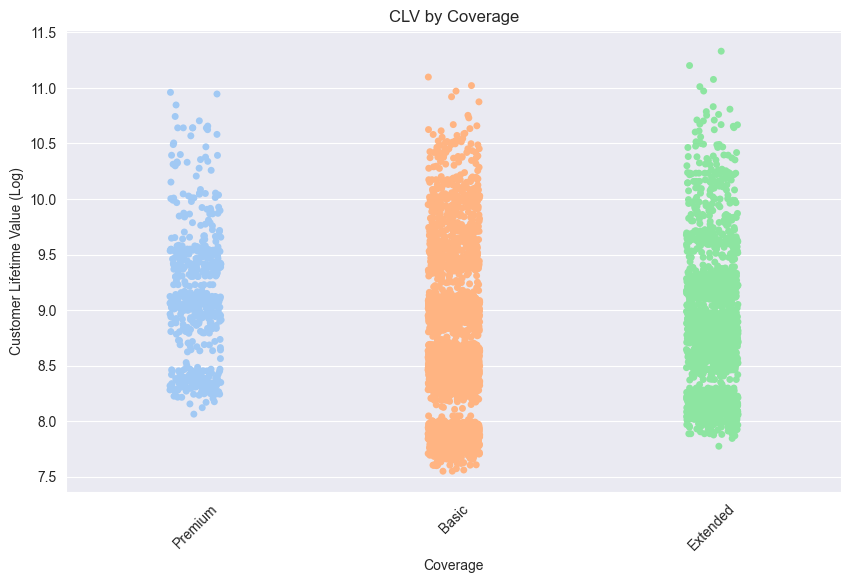

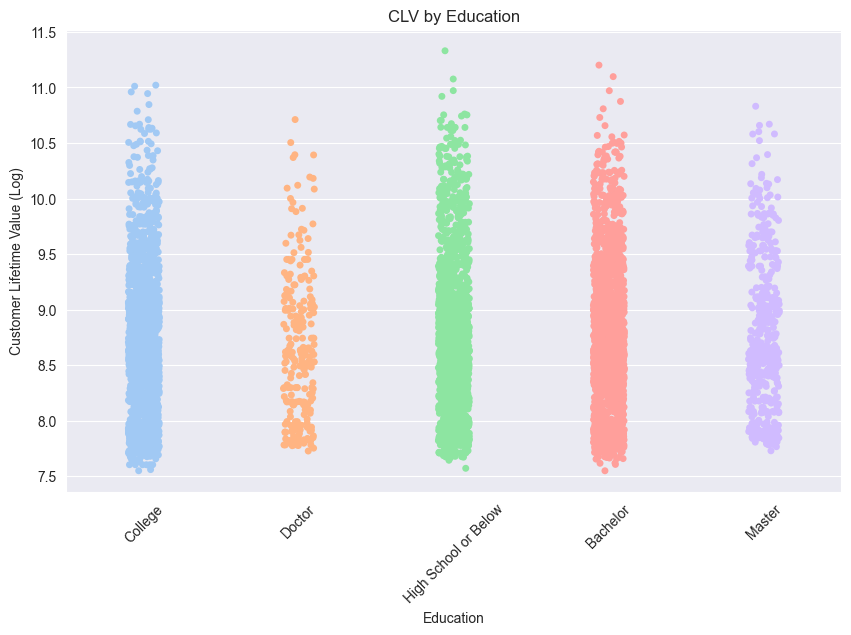

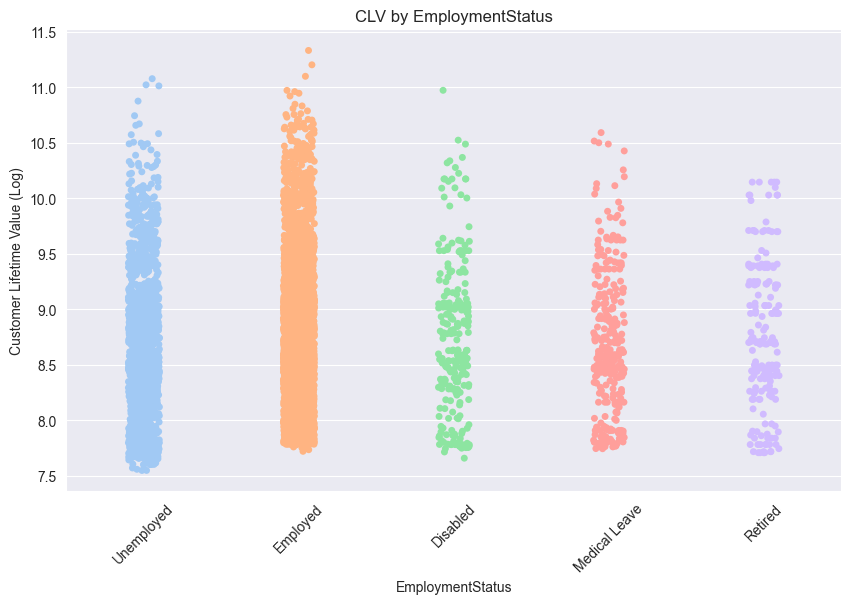

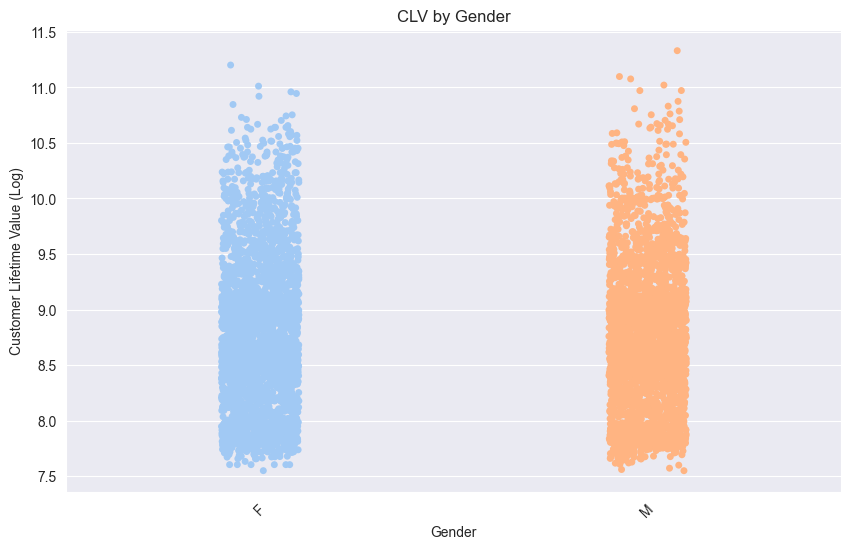

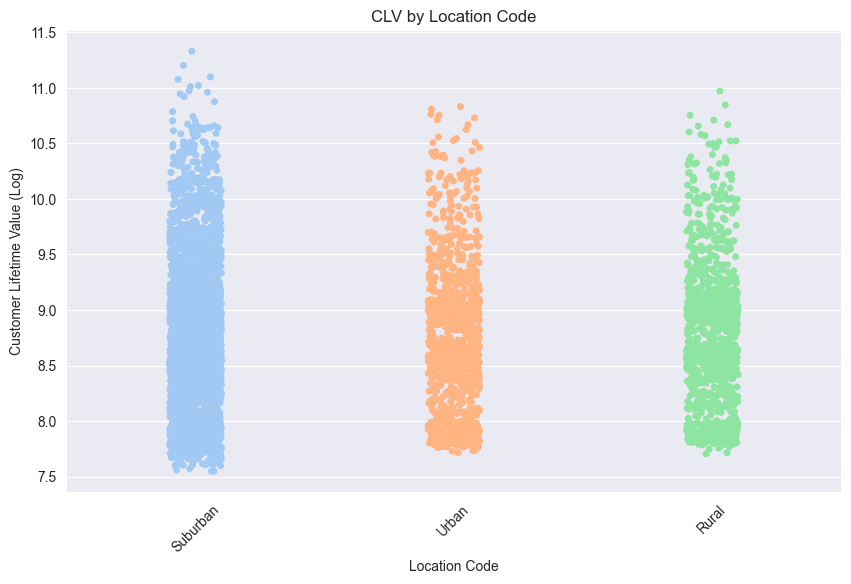

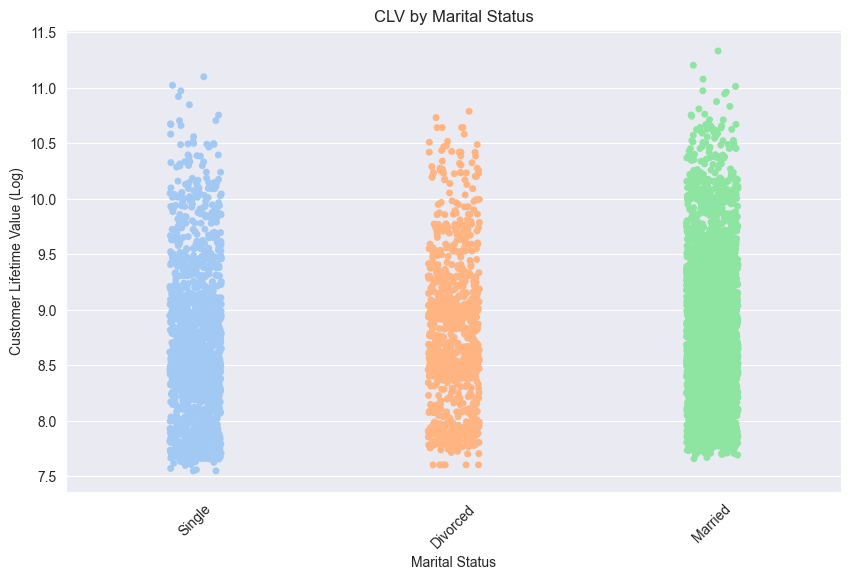

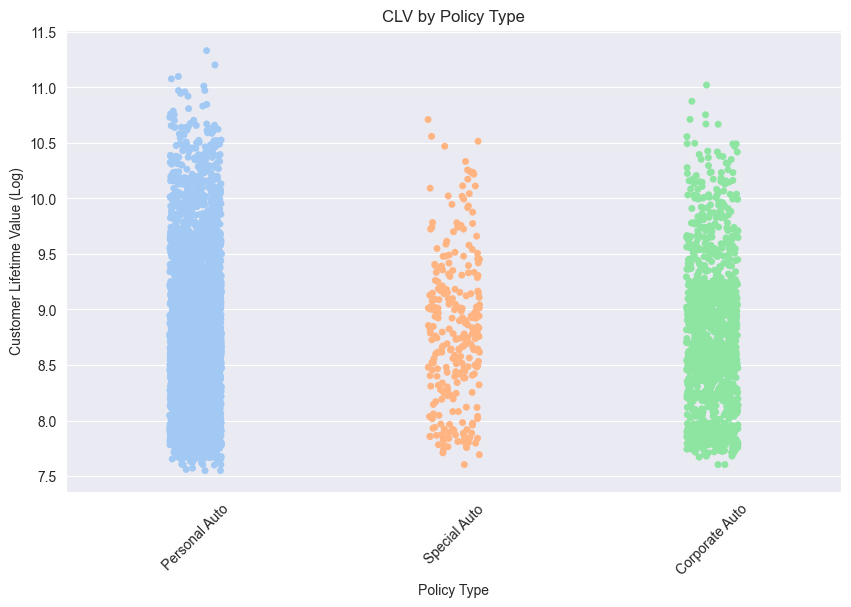

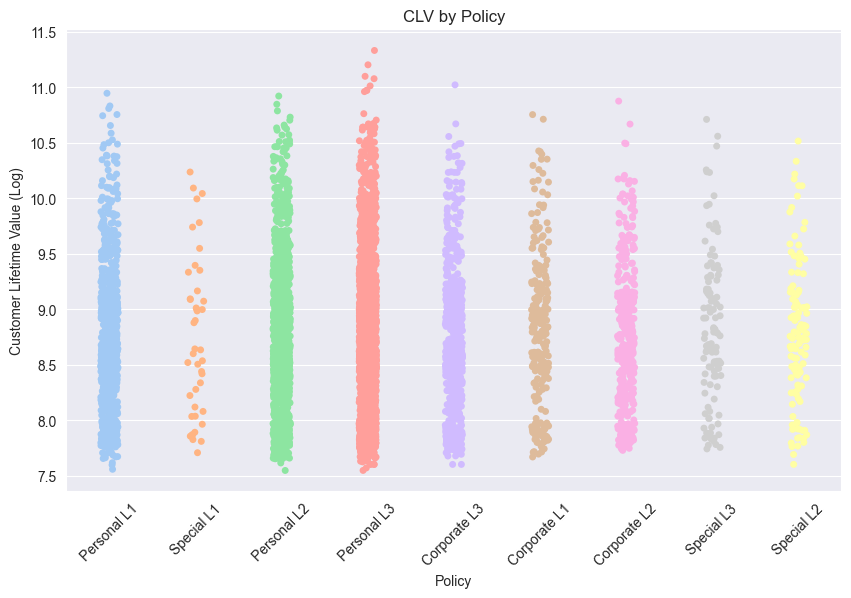

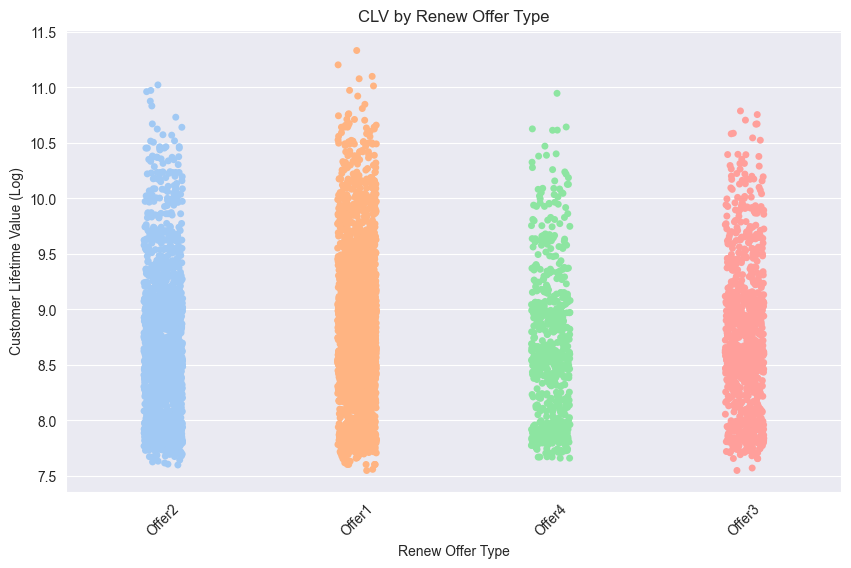

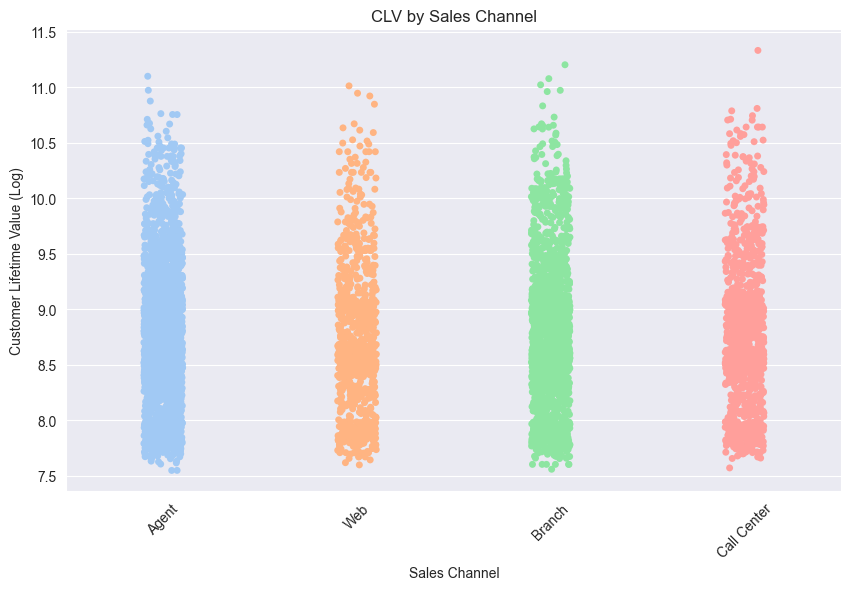

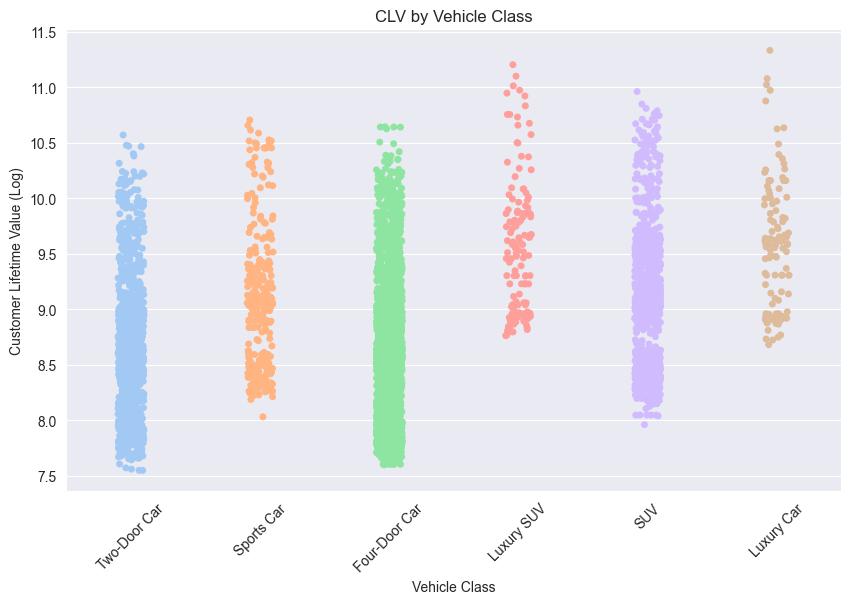

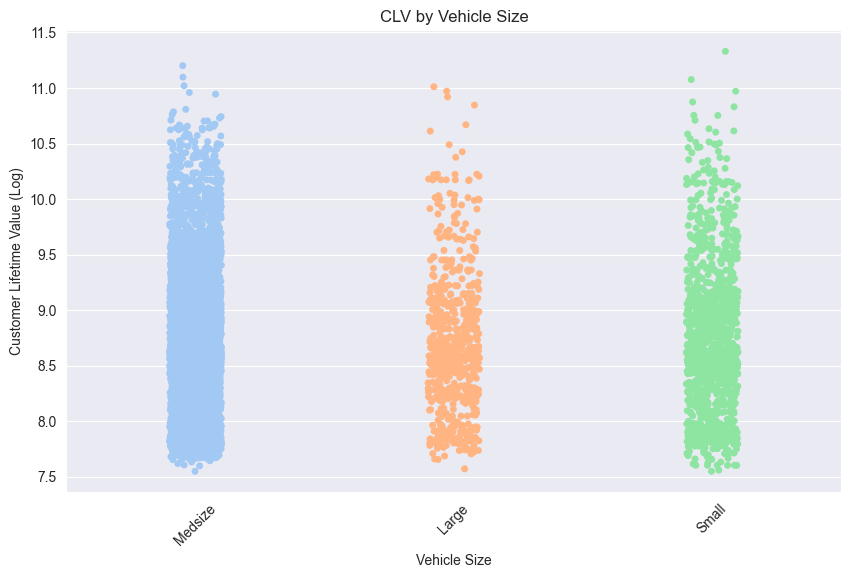

In [64]:
# Generate scatter plots for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.stripplot(x=col, y='Customer Lifetime Value (Log)', data=df_1, jitter=True, palette='pastel')
    plt.title(f'CLV by {col}')
    plt.xticks(rotation=45)
    plt.show()

Include Categorical Variables in the Model
Reason: Most categorical variables have shown some impact on the Customer Lifetime Value (Log) (CLV), either through differences in median values or the presence of outliers. Including these variables will allow the model to capture these variations and potentially improve its predictive power.
2. Outlier Treatment
Approach: Given that outliers are present across various categorical features, it’s important to decide whether to remove, cap, or retain them.
Decision:
Keep Outliers: In most cases, especially with customer data, outliers can represent important segments of your customer base (e.g., very high-value customers). Removing them might lose important information.
Capping Outliers: If you notice that outliers are unduly influencing the model (which we can assess during model evaluation), you might choose to cap them at a certain percentile (e.g., 95th percentile) to reduce their influence.
Current Decision: For now, retain the outliers but monitor the model performance. If the model seems to be biased or shows poor generalization, revisit the outlier treatment step and consider capping.

# **Modeling**

In [68]:
# show all features 

df_modified.columns.to_list(), len(df_modified.columns.to_list())

(['Customer',
  'State',
  'Response',
  'Coverage',
  'Education',
  'Effective To Date',
  'EmploymentStatus',
  'Gender',
  'Income',
  'Location Code',
  'Marital Status',
  'Months Since Last Claim',
  'Months Since Policy Inception',
  'Number of Open Complaints',
  'Number of Policies',
  'Policy Type',
  'Policy',
  'Renew Offer Type',
  'Sales Channel',
  'Vehicle Class',
  'Vehicle Size',
  'Customer Lifetime Value (Log)',
  'Monthly Premium Auto (Log)',
  'Total Claim Amount (Log)'],
 24)

In [99]:
# Drop the 'Customer' column
df_final = df_modified.copy()
df_final = df_final.drop(columns=['Customer','Effective To Date'])

# Check the final DataFrame
print("Final DataFrame after dropping 'Customer'and 'Effective To Date':")
df_final.head()

Final DataFrame after dropping 'Customer'and 'Effective To Date':


State Response  Coverage Education EmploymentStatus Gender  Income  \
0      Oregon       No   Premium   College       Unemployed      F       0   
1      Oregon       No     Basic   College       Unemployed      F       0   
4  Washington       No     Basic   College       Unemployed      M       0   
5      Oregon       No     Basic    Doctor         Employed      M   82601   
6  California       No  Extended   College       Unemployed      F       0   

  Location Code Marital Status  Months Since Last Claim  \
0      Suburban         Single                       29   
1      Suburban         Single                        7   
4      Suburban         Single                        3   
5         Urban       Divorced                        9   
6      Suburban        Married                       18   

   Months Since Policy Inception  Number of Open Complaints  \
0                             60                          0   
1                             34                          1   
4                             33                          0   
5                             38                          0   
6                             48                          0   

   Number of Policies    Policy Type       Policy Renew Offer Type  \
0                   3  Personal Auto  Personal L1           Offer2   
1                   1   Special Auto   Special L1           Offer1   
4                   3  Personal Auto  Personal L2           Offer4   
5                   3  Personal Auto  Personal L2           Offer4   
6                   4  Personal Auto  Personal L3           Offer1   

  Sales Channel  Vehicle Class Vehicle Size  Customer Lifetime Value (Log)  \
0         Agent   Two-Door Car      Medsize                       8.963270   
1         Agent     Sports Car      Medsize                       8.223554   
4           Web   Two-Door Car        Large                       8.443942   
5         Agent  Four-Door Car      Medsize                       8.577214   
6        Branch     Sports Car      Medsize                       9.191038   

   Monthly Premium Auto (Log)  Total Claim Amount (Log)  
0                    4.709530                  6.280021  
1                    4.718499                  6.693819  
4                    4.262680                  6.548486  
5                    4.189655                  5.233181  
6                    4.905275                  6.878797

In [100]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using df_final
X = df_final.drop(columns=['Customer Lifetime Value (Log)'])  # Features
y = df_final['Customer Lifetime Value (Log)']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Display the shapes of the split data
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (4889, 21)
X_test.shape: (1223, 21)
y_train.shape: (4889,)
y_test.shape: (1223,)


In [101]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Define the transformation pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # One-Hot Encode categorical features
])

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations using a pipeline
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Display the shapes of the transformed data
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (4889, 50)
X_test_transformed.shape: (1223, 50)


## **Fit OLS Models**

In [102]:
import statsmodels.api as sm

# Add a constant to the model (required for OLS)
X_train_const = sm.add_constant(X_train_transformed)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the model
print(ols_model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Customer Lifetime Value (Log)   R-squared:                       0.291
Model:                                       OLS   Adj. R-squared:                  0.284
Method:                            Least Squares   F-statistic:                     41.35
Date:                           Mon, 12 Aug 2024   Prob (F-statistic):          9.14e-319
Time:                                   19:57:58   Log-Likelihood:                -4063.2
No. Observations:                           4889   AIC:                             8224.
Df Residuals:                               4840   BIC:                             8543.
Df Model:                                     48                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

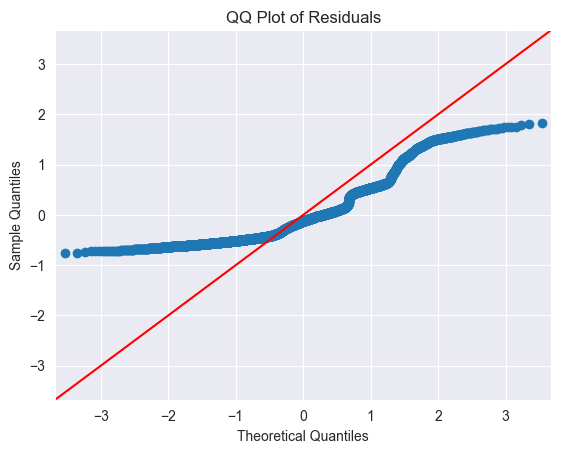

In [103]:
# Predict the training data
y_train_pred = ols_model.predict(X_train_const)

# Calculate residuals
residuals = y_train - y_train_pred

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

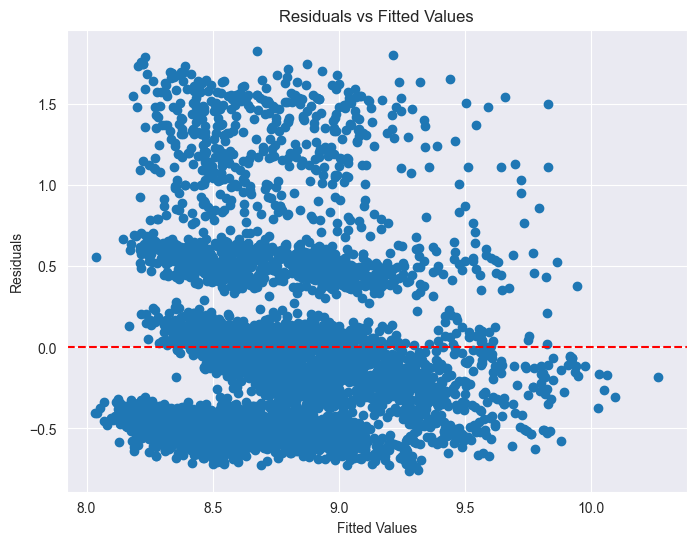

In [104]:
# Scatter plot of residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [108]:
# Get the feature names from the preprocessor
feature_names = numeric_features.tolist() + preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()

# Create a DataFrame for the coefficients
coefficients = pd.DataFrame({
    'Feature': ['const'] + feature_names,
    'Coefficient': ols_model.params
})

# Display the coefficients with feature names
print(coefficients)

                              Feature   Coefficient
const                           const  8.828769e+00
x1                             Income -7.258101e-03
x2            Months Since Last Claim  8.924478e-03
x3      Months Since Policy Inception  2.820236e-03
x4          Number of Open Complaints -2.823704e-02
x5                 Number of Policies  1.306829e-01
x6         Monthly Premium Auto (Log)  2.532230e-01
x7           Total Claim Amount (Log)  1.823457e-02
x8                   State_California  4.068107e-03
x9                       State_Nevada  5.451566e-02
x10                      State_Oregon  2.990631e-02
x11                  State_Washington -1.947647e-02
x12                      Response_Yes -2.523130e-02
x13                 Coverage_Extended  3.519380e-02
x14                  Coverage_Premium  4.875372e-02
x15                 Education_College -2.605765e-02
x16                  Education_Doctor -2.459977e-02
x17    Education_High School or Below  2.803160e-02
x18         

## **Model Summary**

#### R-squared Value:

The R-squared value is **0.291**, meaning that the model explains about 29.1% of the variance in the log-transformed Customer Lifetime Value (CLV). This is relatively low, indicating that the model may not be capturing a significant portion of the variance.

#### Coefficients:

- Some features have significant coefficients (e.g., **Number of Policies, Monthly Premium Auto (Log), Policy Type, Vehicle Class_Luxury Car**), while others do not contribute significantly (p-value > 0.05).
- The presence of extremely large coefficients (e.g., **Policy Type_Personal Auto, Policy_Personal L1, Policy_Personal L2, Policy_Personal L3**) suggests **multicollinearity** or issues with how categorical variables were encoded.

#### Multicollinearity:

- The condition number is very high (**1.14e+16**), which indicates severe multicollinearity issues. This is further supported by the presence of extremely large coefficients for some of the categorical variables.
- The multicollinearity issue suggests that some features are highly correlated, causing instability in the coefficient estimates.

### **Residual Analysis:**

#### Residuals vs Fitted Values:

- The plot shows a pattern, suggesting **non-linearity** in the data that the linear model isn’t capturing.
- There seems to be **heteroscedasticity**, where the spread of the residuals increases as the fitted values increase.

#### QQ Plot:

- The residuals deviate from the line, indicating that they are not normally distributed. This violates one of the key assumptions of OLS regression.

### **Decision:**

Considering the significant issues with multicollinearity, non-linearity, and non-normal residuals, it might be more effective to move beyond OLS and explore more advanced modeling techniques such as:

- **Random Forest or Gradient Boosting**: These can handle non-linear relationships and interactions between features.
- **Lasso or Ridge Regression**: These can help with multicollinearity and might still allow you to use a linear model if you prefer interpretability.



# **Benchmarking Models**

In [114]:
# Initialize the models
models = {
    'Random Forest': RandomForestRegressor(random_state=2024),
    'Gradient Boosting': GradientBoostingRegressor(random_state=2024),
    'Decision Tree': DecisionTreeRegressor(random_state=2024),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Custom MAPE function
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Store results
results_list = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    # Train the model
    model.fit(X_train_transformed, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test_transformed)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    
    # Store the results
    model_results = {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    }
    
    results_list.append(model_results)

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results_list)

# Display the results
results_df = results_df[['Model', 'MAE', 'MSE', 'RMSE', 'R²', 'MAPE']]
results_df

Training and evaluating Random Forest...
Training and evaluating Gradient Boosting...
Training and evaluating Decision Tree...
Training and evaluating Ridge Regression...
Training and evaluating Lasso Regression...
Training and evaluating K-Nearest Neighbors...


Model       MAE       MSE      RMSE        R²      MAPE
0        Random Forest  0.092009  0.037986  0.194899  0.909570  0.973130
1    Gradient Boosting  0.104519  0.040012  0.200031  0.904745  1.110691
2        Decision Tree  0.109097  0.070029  0.264630  0.833285  1.156654
3     Ridge Regression  0.430398  0.308687  0.555596  0.265126  4.850964
4     Lasso Regression  0.515227  0.420086  0.648141 -0.000076  5.868759
5  K-Nearest Neighbors  0.405607  0.322056  0.567500  0.233299  4.582524

In [120]:
# Define the models
models = {
    'Random Forest': RandomForestRegressor(random_state=2024),
    'Gradient Boosting': GradientBoostingRegressor(random_state=2024),
    'Decision Tree': DecisionTreeRegressor(random_state=2024),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Define a custom scorer for MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Scorers for cross-validation
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'RMSE': 'neg_root_mean_squared_error',
    'R2': 'r2',
    'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}

# Store results
train_results_list = []

# Evaluate each model using cross-validation with pipelines
for model_name, model in models.items():
    print(f"Training and cross-validating {model_name}...")
    
    # Create a pipeline with scaling and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Cross-validate the model
    cv_scores = cross_validate(pipeline, X_train_transformed, y_train, cv=5, scoring=scoring)
    
    # Calculate mean scores
    model_results = {
        'Model': model_name,
        'Mean MAE': -np.mean(cv_scores['test_MAE']),
        'Mean MSE': -np.mean(cv_scores['test_MSE']),
        'Mean RMSE': -np.mean(cv_scores['test_RMSE']),
        'Mean R²': np.mean(cv_scores['test_R2']),
        'Mean MAPE': -np.mean(cv_scores['test_MAPE'])
    }
    
    train_results_list.append(model_results)

# Convert the list of results to a DataFrame
train_results_df = pd.DataFrame(train_results_list)

# Display the training results
train_results_df = train_results_df[['Model', 'Mean MAE', 'Mean MSE', 'Mean RMSE', 'Mean R²', 'Mean MAPE']]
train_results_df

Training and cross-validating Random Forest...


Training and cross-validating Gradient Boosting...
Training and cross-validating Decision Tree...
Training and cross-validating Ridge Regression...
Training and cross-validating Lasso Regression...
Training and cross-validating K-Nearest Neighbors...


Model  Mean MAE  Mean MSE  Mean RMSE   Mean R²  Mean MAPE
0        Random Forest  0.093886  0.039252   0.198010  0.909803   0.992905
1    Gradient Boosting  0.107658  0.041495   0.203634  0.904615   1.142376
2        Decision Tree  0.113358  0.074773   0.273055  0.827507   1.203231
3     Ridge Regression  0.436274  0.315422   0.561542  0.274402   4.912657
4     Lasso Regression  0.526528  0.435219   0.659558 -0.000454   5.994398
5  K-Nearest Neighbors  0.469662  0.376195   0.613191  0.134325   5.325928

In [121]:
# Store results for testing phase
test_results_list = []

# Evaluate each model on the test set using pipelines
for model_name, model in models.items():
    print(f"Testing {model_name} on the test set...")
    
    # Create a pipeline with scaling and the model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    # Train the model on the full training data
    pipeline.fit(X_train_transformed, y_train)
    
    # Predict on the test set
    y_test_pred = pipeline.predict(X_test_transformed)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    
    # Store the results
    model_results = {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'MAPE': mape
    }
    
    test_results_list.append(model_results)

# Convert the list of results to a DataFrame
test_results_df = pd.DataFrame(test_results_list)

# Display the test results
test_results_df = test_results_df[['Model', 'MAE', 'MSE', 'RMSE', 'R²', 'MAPE']]
test_results_df

Testing Random Forest on the test set...


Testing Gradient Boosting on the test set...
Testing Decision Tree on the test set...
Testing Ridge Regression on the test set...
Testing Lasso Regression on the test set...
Testing K-Nearest Neighbors on the test set...


Model       MAE       MSE      RMSE        R²      MAPE
0        Random Forest  0.092009  0.037986  0.194899  0.909570  0.973130
1    Gradient Boosting  0.104519  0.040012  0.200031  0.904745  1.110691
2        Decision Tree  0.109097  0.070029  0.264630  0.833285  1.156654
3     Ridge Regression  0.430525  0.308795  0.555693  0.264869  4.852439
4     Lasso Regression  0.515227  0.420086  0.648141 -0.000076  5.868759
5  K-Nearest Neighbors  0.478247  0.379061  0.615680  0.097590  5.435760

# Insights from the Training and Testing Results:

#### Model Consistency:
- **Random Forest** and **Gradient Boosting** show very consistent performance across both training and testing datasets.
- The metrics for these models are closely aligned, suggesting that they generalize well and are not overfitting.

#### Best Overall Performance:
- **Random Forest** has the lowest **MAE, MSE, RMSE, and MAPE**, along with the highest **R²** on both training and testing datasets. This indicates that it is the best-performing model overall.
- **Gradient Boosting** is a close second, with slightly higher errors and slightly lower **R²** compared to Random Forest, but still a very strong performer.

#### Underperforming Models:
- **Ridge Regression, Lasso Regression,** and **K-Nearest Neighbors** perform significantly worse, with much higher **MAE, MSE, RMSE,** and **MAPE** values. Their **R²** values are also much lower, indicating that they are not capturing the relationship between features and the target variable as well as the tree-based models.
- **Lasso Regression** even shows a negative **R²** value on the test set, indicating that it performs worse than a simple mean prediction.

#### Decision Tree:
- **Decision Tree** performs reasonably well but shows higher errors and a lower **R²** compared to Random Forest and Gradient Boosting. This suggests that while it captures some of the data structure, it’s prone to overfitting (as indicated by the drop in performance from training to testing).

# Top 2 Models:

#### 1. Random Forest:
**Training Results:**
- Mean MAE: **0.0939**
- Mean RMSE: **0.1980**
- Mean R²: **0.9098**
- Mean MAPE: **0.9929%**

**Testing Results:**
- MAE: **0.0920**
- RMSE: **0.1949**
- R²: **0.9096**
- MAPE: **0.9731%**

**Insight:** Random Forest consistently shows the best performance with minimal error and high predictive accuracy.

#### 2. Gradient Boosting:
**Training Results:**
- Mean MAE: **0.1077**
- Mean RMSE: **0.2036**
- Mean R²: **0.9046**
- Mean MAPE: **1.1424%**

**Testing Results:**
- MAE: **0.1045**
- RMSE: **0.2000**
- R²: **0.9047**
- MAPE: **1.1107%**

**Insight:** Gradient Boosting is a strong competitor to Random Forest, with slightly higher errors but still very strong performance.

# *Conclusion*
- **Random Forest** is the best overall model, with the lowest errors and the highest **R²**, indicating that it’s the best at predicting the Customer Lifetime Value (CLV) in this dataset.
- **Gradient Boosting** is the second-best model, with performance metrics close to Random Forest, making it another viable option.


# **Recursive Feature Selection**

In [124]:
from sklearn.feature_selection import RFE

In [125]:
# Get the original feature names before transformation
numeric_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns

# Build the ColumnTransformer to handle both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [133]:
# Fit the preprocessor and transform the training data
X_train_transformed_full = preprocessor.fit_transform(X_train)
X_test_transformed_full = preprocessor.transform(X_test)

# Get feature names after one-hot encoding and scaling
transformed_feature_names = np.hstack([
    preprocessor.transformers_[0][2],  # numeric feature names
    preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)  # one-hot encoded feature names
])

In [134]:
# Define the models for RFE
rf_model = RandomForestRegressor(random_state=2024)
gb_model = GradientBoostingRegressor(random_state=2024)

# Perform RFE with Random Forest
rfe_rf = RFE(estimator=rf_model, n_features_to_select=10)  # Adjust number of features to select
rfe_rf.fit(X_train_transformed_full, y_train)

# Perform RFE with Gradient Boosting
rfe_gb = RFE(estimator=gb_model, n_features_to_select=10)  # Adjust number of features to select
rfe_gb.fit(X_train_transformed_full, y_train)

# Get the indices of the selected features
selected_indices_rf = rfe_rf.support_
selected_indices_gb = rfe_gb.support_

# Use the indices to select the feature names
selected_features_rf = transformed_feature_names[selected_indices_rf]
selected_features_gb = transformed_feature_names[selected_indices_gb]

In [135]:
print("Selected Features by Random Forest RFE:")
print(selected_features_rf)

print("\nSelected Features by Gradient Boosting RFE:")
print(selected_features_gb)

Selected Features by Random Forest RFE:
['Income' 'Months Since Last Claim' 'Months Since Policy Inception'
 'Number of Open Complaints' 'Number of Policies'
 'Monthly Premium Auto (Log)' 'Total Claim Amount (Log)' 'Coverage_Basic'
 'EmploymentStatus_Employed' 'Gender_M']

Selected Features by Gradient Boosting RFE:
['Income' 'Months Since Last Claim' 'Months Since Policy Inception'
 'Number of Open Complaints' 'Number of Policies'
 'Monthly Premium Auto (Log)' 'Total Claim Amount (Log)'
 'EmploymentStatus_Employed' 'Gender_F' 'Marital Status_Single']


### **Training and Test RFE**

In [149]:
# Create pipelines for Random Forest and Gradient Boosting with RFE included
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfe', RFE(estimator=RandomForestRegressor(random_state=2024), n_features_to_select=10)),
    ('model', RandomForestRegressor(random_state=2024))
])

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfe', RFE(estimator=GradientBoostingRegressor(random_state=2024), n_features_to_select=10)),
    ('model', GradientBoostingRegressor(random_state=2024))
])

# Define the scoring metrics
scoring_metrics = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2', 'neg_mean_absolute_percentage_error']

# Cross-validation for Random Forest with additional metrics
cv_results_rf = cross_validate(rf_pipeline, X_train, y_train, cv=5, scoring=scoring_metrics)
cv_mae_rf = -cv_results_rf['test_neg_mean_absolute_error'].mean()
cv_mse_rf = -cv_results_rf['test_neg_mean_squared_error'].mean()
cv_r2_rf = cv_results_rf['test_r2'].mean()
cv_rmse_rf = np.sqrt(cv_mse_rf)  # RMSE is the square root of MSE
cv_mape_rf = -cv_results_rf['test_neg_mean_absolute_percentage_error'].mean()

# Cross-validation for Gradient Boosting with additional metrics
cv_results_gb = cross_validate(gb_pipeline, X_train, y_train, cv=5, scoring=scoring_metrics)
cv_mae_gb = -cv_results_gb['test_neg_mean_absolute_error'].mean()
cv_mse_gb = -cv_results_gb['test_neg_mean_squared_error'].mean()
cv_r2_gb = cv_results_gb['test_r2'].mean()
cv_rmse_gb = np.sqrt(cv_mse_gb)  # RMSE is the square root of MSE
cv_mape_gb = -cv_results_gb['test_neg_mean_absolute_percentage_error'].mean()

# Compile results into a comparison table
cv_results_df = pd.DataFrame({
    'Model': ['Random Forest (RFE Features)', 'Gradient Boosting (RFE Features)'],
    'Cross-Validation MAE': [cv_mae_rf, cv_mae_gb],
    'Cross-Validation MSE': [cv_mse_rf, cv_mse_gb],
    'Cross-Validation RMSE': [cv_rmse_rf, cv_rmse_gb],
    'Cross-Validation R²': [cv_r2_rf, cv_r2_gb],
    'Cross-Validation MAPE': [cv_mape_rf, cv_mape_gb]
})

# Display the cross-validation results
cv_results_df = cv_results_df[['Model', 'Cross-Validation MAE', 'Cross-Validation MSE', 'Cross-Validation RMSE', 'Cross-Validation R²', 'Cross-Validation MAPE']]
cv_results_df

Model  Cross-Validation MAE  \
0      Random Forest (RFE Features)              0.093013   
1  Gradient Boosting (RFE Features)              0.107730   

   Cross-Validation MSE  Cross-Validation RMSE  Cross-Validation R²  \
0              0.039291               0.198219             0.909699   
1              0.041321               0.203276             0.905024   

   Cross-Validation MAPE  
0               0.009858  
1               0.011438

In [150]:
# TEST
# Fit Random Forest pipeline with RFE features
rf_pipeline.fit(X_train, y_train)
rf_y_pred_test = rf_pipeline.predict(X_test)

# Fit Gradient Boosting pipeline with RFE features
gb_pipeline.fit(X_train, y_train)
gb_y_pred_test = gb_pipeline.predict(X_test)

In [151]:
# Calculate evaluation metrics on the test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Random Forest metrics
rf_test_mae = mean_absolute_error(y_test, rf_y_pred_test)
rf_test_mse = mean_squared_error(y_test, rf_y_pred_test)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_test_r2 = r2_score(y_test, rf_y_pred_test)
rf_test_mape = mean_absolute_percentage_error(y_test, rf_y_pred_test)

# Gradient Boosting metrics
gb_test_mae = mean_absolute_error(y_test, gb_y_pred_test)
gb_test_mse = mean_squared_error(y_test, gb_y_pred_test)
gb_test_rmse = np.sqrt(gb_test_mse)
gb_test_r2 = r2_score(y_test, gb_y_pred_test)
gb_test_mape = mean_absolute_percentage_error(y_test, gb_y_pred_test)

# Compile test results into a comparison table
test_results_df = pd.DataFrame({
    'Model': ['Random Forest (RFE Features)', 'Gradient Boosting (RFE Features)'],
    'Test MAE': [rf_test_mae, gb_test_mae],
    'Test MSE': [rf_test_mse, gb_test_mse],
    'Test RMSE': [rf_test_rmse, gb_test_rmse],
    'Test R²': [rf_test_r2, gb_test_r2],
    'Test MAPE': [rf_test_mape, gb_test_mape]
})

test_results_df

Model  Test MAE  Test MSE  Test RMSE   Test R²  \
0      Random Forest (RFE Features)  0.093090  0.039793   0.199481  0.905268   
1  Gradient Boosting (RFE Features)  0.105395  0.040299   0.200747  0.904062   

   Test MAPE  
0   0.009870  
1   0.011207

# **Insights from RFE Model Training and Testing Results**

## Train RFE

### Model Consistency:
- **Random Forest (RFE Features)** and **Gradient Boosting (RFE Features)** demonstrate consistent performance during cross-validation, with metrics closely aligned between the two models.

### Performance Comparison:
- **Random Forest (RFE Features)** slightly outperforms **Gradient Boosting (RFE Features)** in all metrics:
  - **MAE (Mean Absolute Error):** 0.093013 (Random Forest) vs. 0.107730 (Gradient Boosting)
  - **MSE (Mean Squared Error):** 0.039291 (Random Forest) vs. 0.041321 (Gradient Boosting)
  - **RMSE (Root Mean Squared Error):** 0.198219 (Random Forest) vs. 0.203276 (Gradient Boosting)
  - **R²:** 0.909699 (Random Forest) vs. 0.905024 (Gradient Boosting)
  - **MAPE (Mean Absolute Percentage Error):** 0.009858 (Random Forest) vs. 0.011438 (Gradient Boosting)
- The higher **R²** value for **Random Forest (RFE Features)** indicates that it explains slightly more variance in the data compared to **Gradient Boosting (RFE Features)**.

## Test RFE

### Model Generalization:
- Both models generalize well from training to testing, with metrics remaining consistent across both datasets.
- **Random Forest (RFE Features)** continues to show marginally better performance compared to **Gradient Boosting (RFE Features)** on the test set.

### Performance on Test Data:
- **Random Forest (RFE Features)**:
  - **Test MAE:** 0.093090
  - **Test MSE:** 0.039793
  - **Test RMSE:** 0.199481
  - **Test R²:** 0.905268
  - **Test MAPE:** 0.009870
- **Gradient Boosting (RFE Features)**:
  - **Test MAE:** 0.105395
  - **Test MSE:** 0.040299
  - **Test RMSE:** 0.200747
  - **Test R²:** 0.904062
  - **Test MAPE:** 0.011207

### Conclusion:
- **Random Forest (RFE Features)** is the better performing model overall, with slightly lower errors and higher R² values on both training and testing datasets, indicating it captures the relationship between features and the target variable more effectively.
- **Gradient Boosting (RFE Features)** is a close second, with performance metrics that are only slightly lower than those of **Random Forest**. This makes it a viable alternative if additional flexibility or interpretability is required.


___

# **Conclusion Top 2 Models for Hyperparameter Tuning**

### 1. Random Forest with RFE Features:
- The model shows robust performance with very minimal differences between the training and testing phases.
- **R²** remains strong, and the error metrics are consistent, making it a strong candidate for further refinement.

### 2. Gradient Boosting with RFE Features:
- Although it slightly lags behind Random Forest, Gradient Boosting still shows consistent performance across the board.
- The slight dip in test **R²** and **RMSE** might be improved with hyperparameter tuning.


____

# **Hyperparameter Tuning**

In [157]:
# Define a smaller, more focused parameter grid for Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 150],  # Reduced number of estimators
    'model__max_depth': [10, 15],       # Reduced range of max_depth
    'model__min_samples_split': [5],    # Fixed value for min_samples_split
    'model__min_samples_leaf': [2]      # Fixed value for min_samples_leaf
}

# Set up GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Income', 'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Monthly Premium Auto (Log)', 'Total Claim Amount (Log)'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['...
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object'))])),
                                       ('rfe',
                                        RFE(estimator=RandomForestRegressor(random_state=2024),
                                            n_features_to_select=10)),
                                       ('model',
                                        RandomForestRegressor(random_state=2024))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 15],
                         'model__min_samples_leaf': [2],
                         'model__min_samples_split': [5],
                         'model__n_estimators': [100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [164]:
# Get the best models
best_rf = grid_search_rf.best_estimator_
print(best_rf)

# Get the best parameters
best_rf_params = grid_search_rf.best_params_
print(best_rf_params)

# Best Score
print(f'Best Score: {grid_search_rf.best_score_}')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Income', 'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Monthly Premium Auto (Log)', 'Total Claim Amount (Log)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['State', 'Response', 'Coverage'...oymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object'))])),
                ('rfe',
                 RFE(estimator=RandomForestRegressor(random_state=2024),
                     n_features_to_select=10)),
                ('model',
           

In [159]:
# Define a smaller, more focused parameter grid for Gradient Boosting
param_grid_gb = {
    'model__n_estimators': [100, 150],      # Reduced number of estimators
    'model__learning_rate': [0.05, 0.1],    # Focused on common learning rates
    'model__max_depth': [3, 5],             # Reduced range of max_depth
    'model__min_samples_split': [5],        # Fixed value for min_samples_split
    'model__min_samples_leaf': [2]          # Fixed value for min_samples_leaf
}

# Set up GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_gb.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Income', 'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Monthly Premium Auto (Log)', 'Total Claim Amount (Log)'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['...
                                        RFE(estimator=GradientBoostingRegressor(random_state=2024),
                                            n_features_to_select=10)),
                                       ('model',
                                        GradientBoostingRegressor(random_state=2024))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [3, 5],
                         'model__min_samples_leaf': [2],
                         'model__min_samples_split': [5],
                         'model__n_estimators': [100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [165]:
# Get the best models
best_gb = grid_search_gb.best_estimator_
print(best_gb)

# Get the best parameters  
best_gb_params = grid_search_gb.best_params_
print(best_gb_params)

# Best Score
print(f'Best Score: {grid_search_gb.best_score_}')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Income', 'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Monthly Premium Auto (Log)', 'Total Claim Amount (Log)'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['State', 'Response', 'Coverage'...',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object'))])),
                ('rfe',
                 RFE(estimator=GradientBoostingRegressor(random_state=2024),
                     n_features_to_select=10)),
                ('model',
                 Gr

In [161]:
# Evaluate the best models on the test set
rf_best_y_pred_test = best_rf.predict(X_test)

In [162]:
# Evaluate the best models on the test set
gb_best_y_pred_test = best_gb.predict(X_test)

In [163]:
# Calculate evaluation metrics for the best Random Forest model
rf_best_mae = mean_absolute_error(y_test, rf_best_y_pred_test)
rf_best_mse = mean_squared_error(y_test, rf_best_y_pred_test)
rf_best_rmse = np.sqrt(rf_best_mse)
rf_best_r2 = r2_score(y_test, rf_best_y_pred_test)
rf_best_mape = mean_absolute_percentage_error(y_test, rf_best_y_pred_test)

# Calculate evaluation metrics for the best Gradient Boosting model
gb_best_mae = mean_absolute_error(y_test, gb_best_y_pred_test)
gb_best_mse = mean_squared_error(y_test, gb_best_y_pred_test)
gb_best_rmse = np.sqrt(gb_best_mse)
gb_best_r2 = r2_score(y_test, gb_best_y_pred_test)
gb_best_mape = mean_absolute_percentage_error(y_test, gb_best_y_pred_test)

In [166]:
# Compile results into a DataFrame for comparison
tuned_results_df = pd.DataFrame({
    'Model': ['Random Forest (Tuned)', 'Gradient Boosting (Tuned)'],
    'Test MAE': [rf_best_mae, gb_best_mae],
    'Test MSE': [rf_best_mse, gb_best_mse],
    'Test RMSE': [rf_best_rmse, gb_best_rmse],
    'Test R²': [rf_best_r2, gb_best_r2],
    'Test MAPE': [rf_best_mape, gb_best_mape]
})

tuned_results_df

Model  Test MAE  Test MSE  Test RMSE   Test R²  \
0      Random Forest (Tuned)  0.093137  0.038954   0.197367  0.907265   
1  Gradient Boosting (Tuned)  0.106011  0.039586   0.198964  0.905759   

   Test MAPE  
0   0.009869  
1   0.011300

# **Analysis and Insights**

### **Performance Metrics**

- **Test MSE (Mean Squared Error):** The RF model has a slightly lower Test MSE compared to the GB model, indicating slightly better performance in terms of prediction accuracy.
- **Test RMSE (Root Mean Squared Error):** RF also has a lower RMSE, suggesting it makes fewer large errors compared to GB.
- **Test R² (R-squared):** Both models have very high R² values, with RF slightly higher, meaning both models explain the variance in the target variable quite well, but RF does so slightly better.
- **Test MAE (Mean Absolute Error):** The RF model has a lower MAE, indicating it generally has smaller prediction errors on average compared to GB.
- **Test MAPE (Mean Absolute Percentage Error):** RF also has a lower MAPE, indicating it has better performance when errors are considered in percentage terms.

### **Interpretation**

- **Random Forest (RF):** The tuned RF model consistently outperforms the tuned GB model across all key metrics. This suggests that RF is slightly better at making accurate predictions and explaining the variance in the target variable in this context.
- **Gradient Boosting (GB):** Although GB performed well, it lags slightly behind RF in every metric, indicating that the additional complexity of GB may not be providing significant benefits for this particular dataset.
